# Import Library

In [ ]:
!pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import os
from os import listdir
import os.path as op
from glob import glob
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import cv2
from google.colab.patches import cv2_imshow

from sklearn.model_selection import  train_test_split

In [ ]:
import torch

from torchvision import datasets , models , transforms
import torchvision.transforms as T
from torch.utils.data import DataLoader

import torch.nn as nn
from tqdm.auto import tqdm
import torch.nn.functional as F
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix

# Load Data and Relocate

### load and set root

In [ ]:
!git clone https://github.com/seensiravit/Parkinson-Early-Detection.git

Cloning into 'Parkinson-Early-Detection'...
remote: Enumerating objects: 1248, done.
remote: Counting objects: 100% (708/708), done.
remote: Compressing objects: 100% (677/677), done.
remote: Total 1248 (delta 30), reused 698 (delta 20), pack-reused 540
Receiving objects: 100% (1248/1248), 147.89 MiB | 12.39 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
input_grandroot = 'Parkinson-Early-Detection/dataset/Data'
input_test_root , input_train_root = glob(f"{input_grandroot}/*")

if 'test' in input_train_root : input_train_root, input_test_root = input_test_root, input_train_root

print(f"input_grandroot : {input_grandroot}")
print(f"input_test_root : {input_test_root}")
print(f"input_train_root : {input_train_root}")

input_grandroot : Parkinson-Early-Detection/dataset/Data
input_test_root : Parkinson-Early-Detection/dataset/Data/test
input_train_root : Parkinson-Early-Detection/dataset/Data/train


In [ ]:
input_train_patient_root, input_train_healthy_root = glob(f"{input_train_root}/*")
input_test_patient_root, input_test_healthy_root = glob(f"{input_test_root}/*")

if 'Healthy' in input_test_patient_root : input_test_healthy_root, input_test_patient_root = input_test_patient_root, input_test_healthy_root
if 'Healthy' in input_train_patient_root : input_train_healthy_root, input_train_patient_root = input_train_patient_root, input_train_healthy_root

print(f"input_train_healthy_root : {input_train_healthy_root}")
print(f"input_train_patient_root : {input_train_patient_root}")
print(f"input_test_healthy_root : {input_test_healthy_root}")
print(f"input_test_patient_root : {input_test_patient_root}")

input_train_healthy_root : Parkinson-Early-Detection/dataset/Data/train/Healthy
input_train_patient_root : Parkinson-Early-Detection/dataset/Data/train/Patient
input_test_healthy_root : Parkinson-Early-Detection/dataset/Data/test/Healthy
input_test_patient_root : Parkinson-Early-Detection/dataset/Data/test/Patient


In [ ]:
input_train_healthy_path = glob(f"{input_train_healthy_root}/*.jpg")
input_train_patient_path = glob(f"{input_train_patient_root}/*.jpg")

input_test_healthy_path = glob(f"{input_test_healthy_root}/*.jpg")
input_test_patient_path = glob(f"{input_test_patient_root}/*.jpg")

print(f"number of train set's images -> healthy : {len(input_train_healthy_path)} , patient : {len(input_train_patient_path)}")
print(f"number of test set's images -> healthy : {len(input_test_healthy_path)} , patient : {len(input_test_patient_path)}")

number of train set's images -> healthy : 180 , patient : 165
number of test set's images -> healthy : 10 , patient : 10


In [ ]:
df_train_healthy = pd.DataFrame({"path" : path , "PD" : False} for path in input_train_healthy_path)
df_train_patient = pd.DataFrame({"path" : path , "PD" : True} for path in input_train_patient_path)

print("df_train_healthy")
print(df_train_healthy.describe())

print()

print("df_train_patient")
print(df_train_patient.describe())

df_train_healthy
                                                     path     PD
count                                                 180    180
unique                                                180      1
top     Parkinson-Early-Detection/dataset/Data/train/H...  False
freq                                                    1    180

df_train_patient
                                                     path    PD
count                                                 165   165
unique                                                165     1
top     Parkinson-Early-Detection/dataset/Data/train/P...  True
freq                                                    1   165


In [ ]:
input_train_df = pd.concat([df_train_healthy , df_train_patient])
input_train_df = input_train_df.sample(frac=1).reset_index(drop = True)

input_train_df.describe()

path     PD
count                                                 345    345
unique                                                345      2
top     Parkinson-Early-Detection/dataset/Data/train/P...  False
freq                                                    1    180

In [ ]:
input_train_df["ID"] = input_train_df.path.map(lambda x: op.basename(x).replace(".jpg", ""))

In [ ]:
input_train_df.head(10)

path     PD       ID
0  Parkinson-Early-Detection/dataset/Data/train/P...   True  sp1-P27
1  Parkinson-Early-Detection/dataset/Data/train/P...   True   sp1-P1
2  Parkinson-Early-Detection/dataset/Data/train/H...  False  sp4-H16
3  Parkinson-Early-Detection/dataset/Data/train/H...  False  V04HE01
4  Parkinson-Early-Detection/dataset/Data/train/H...  False  sp3-H30
5  Parkinson-Early-Detection/dataset/Data/train/H...  False  sp3-H38
6  Parkinson-Early-Detection/dataset/Data/train/H...  False  sp2-H11
7  Parkinson-Early-Detection/dataset/Data/train/H...  False  sp3-H12
8  Parkinson-Early-Detection/dataset/Data/train/P...   True   sp2-P7
9  Parkinson-Early-Detection/dataset/Data/train/H...  False  sp2-H16

## Split Data (train and validation)

In [ ]:
seed = 0

In [ ]:
train_df , val_df = train_test_split(input_train_df , test_size=0.2, random_state = seed, stratify=input_train_df["PD"])

In [ ]:
train_count = train_df["PD"].value_counts()
val_count = val_df["PD"].value_counts()

print(f"train set's ratio : {train_count[0] / train_count[1]}")
print(f"validation set's ratio : {val_count[0] / val_count[1]}")

train set's ratio : 1.0909090909090908
validation set's ratio : 1.0909090909090908


In [ ]:
train_df.head()

path     PD       ID
330  Parkinson-Early-Detection/dataset/Data/train/H...  False  sp4-H37
200  Parkinson-Early-Detection/dataset/Data/train/H...  False  V02HE03
222  Parkinson-Early-Detection/dataset/Data/train/P...   True  sp3-P18
289  Parkinson-Early-Detection/dataset/Data/train/H...  False  sp3-H29
333  Parkinson-Early-Detection/dataset/Data/train/P...   True   sp1-P3

## relocate file address

### train and validation

In [ ]:
data_root = 'data'
if not op.exists(data_root) : os.makedirs(data_root)

In [ ]:
Healthy_or_PD = lambda is_PD : 'Patient' if is_PD else 'Healthy'

In [ ]:
print(f"input = True : {Healthy_or_PD(True)}")
print(f"input = False : {Healthy_or_PD(False)}")

input = True : Patient
input = False : Healthy


In [ ]:
for df,f in zip([train_df , val_df] , ["train" , "validation"]) :
  for _ ,r in df.iterrows() :
    d = op.join(data_root , f , Healthy_or_PD(r['PD']))
    if not op.exists(d) :
      os.makedirs(d)
    shutil.copy(r.path , op.join(data_root , f , Healthy_or_PD(r['PD']) , f"{r.ID}.jpg"))
    # print(op.join(data_root , f , Healthy_or_PD(r['PD']) , f"{r['ID']}.jpg"))

### test

In [ ]:
data_test_root = f"{data_root}/test"
if not op.exists(data_test_root) : os.makedirs(data_test_root)

In [ ]:
# test healthy
data_test_healthy_root = f"{data_test_root}/Healthy"
if not op.exists(data_test_healthy_root) : os.makedirs(data_test_healthy_root)

for path in input_test_healthy_path :
  shutil.copy(path , op.join(data_test_healthy_root , f"{op.basename(path)}.jpg"))

print(len(listdir(data_test_healthy_root)))

10


In [ ]:
# test patient
data_test_patient_root = f"{data_test_root}/Patient"
if not op.exists(data_test_patient_root) : os.makedirs(data_test_patient_root)

for path in input_test_patient_path :
  shutil.copy(path , op.join(data_test_patient_root , f"{op.basename(path)}.jpg"))

print(len(listdir(data_test_patient_root)))

10


# Transfrom and DataLoader

In [ ]:
train_transform = T.Compose([
    T.Resize((224 , 224)) ,
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

train_transform_flip = T.Compose([
    T.Resize((224 , 224)) ,
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

val_transform = T.Compose([
    T.Resize((224 , 224)),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225),)
])

In [ ]:
train_data = datasets.ImageFolder("data/train/" , transform=train_transform)
train_data_flip = datasets.ImageFolder("data/train/" , transform=train_transform_flip)
val_data = datasets.ImageFolder("data/validation/" , transform=val_transform)

In [ ]:
train_loader = DataLoader(train_data , batch_size=32 , shuffle = True)
train_loader_flip = DataLoader(train_data_flip , batch_size=32 , shuffle = True)
val_loader = DataLoader(val_data , batch_size=32 , shuffle = False)

In [ ]:
n_train = len(train_loader.dataset)
n_val = len(val_loader.dataset)

print(f"n_train: {n_train} , n_va: {n_val}")
print(f"n_notflip: {len(train_loader.dataset)} , n_flip: {len(train_loader_flip.dataset)}")

n_train: 276 , n_va: 69
n_notflip: 276 , n_flip: 276


In [ ]:
train_loader.dataset

Dataset ImageFolder
    Number of datapoints: 276
    Root location: data/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [ ]:
train_loader_flip.dataset

Dataset ImageFolder
    Number of datapoints: 276
    Root location: data/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [ ]:
val_loader.dataset

Dataset ImageFolder
    Number of datapoints: 69
    Root location: data/validation/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

# Training

In [ ]:
n_epoch = 40

## Function : train-model , predict-result , plot_history

In [ ]:
def train_model(train_loader, val_loader, model, cross_entropy, optimizer, n_epochs = 20 , lr=0.001) :

  gpu = torch.cuda.is_available()
  print(gpu)

  if gpu :
    model.cuda()

  history = pd.DataFrame(columns=["train_loss" , "val_loss" , "train_acc" , "val_acc"])

  for epoch in range(n_epochs):

      train_correct , val_correct = 0 , 0
      train_loss, val_loss = 0, 0

      model.train()
      for images, labels in tqdm(train_loader):
          if gpu : images, labels = images.cuda(), labels.cuda()

          optimizer.zero_grad()
          outputs = model(images) # คำนวณหา output (pred) จาก โมเดลที่มีอยู่
          loss = cross_entropy(outputs, labels)
          loss.backward() # คำนวณ gradient จาก loss ที่ได้
          optimizer.step() # อัพเดทพารามิเตอร์ของโมเดล

          _, predicted = torch.max(outputs, 1)
          train_correct += (predicted == labels).sum().item()

          train_loss += loss.item() * images.size(0)

      train_acc = train_correct / len(train_loader.dataset)

      model.eval() # เซ็ตเป็น evaluation mode
      for images, labels in tqdm(val_loader):
          if gpu : images, labels = images.cuda(), labels.cuda()

          outputs = model(images)

          _, predicted = torch.max(outputs, 1)
          val_correct += (predicted == labels).sum().item()

          loss = cross_entropy(outputs, labels)
          val_loss += loss.item() * images.size(0)

      val_acc = val_correct / len(val_loader.dataset)

      history.loc[len(history.index)] = [train_loss/n_train , val_loss/n_val , train_acc , val_acc]

      print("epoch: {} Training loss = {}, Validation loss = {} , train_acc = {}, val_acc = {}".format(epoch, train_loss / n_train, val_loss / n_val, train_acc , val_acc))

  return history


In [ ]:
def predict_result(model , loader) :
  gpu = torch.cuda.is_available()
  print(gpu)

  if gpu :
    model.cuda()

  y_pred , y_true  = [] , []
  model.eval()

  for images , labels in tqdm(loader) :
    if gpu :
      images , labels = images.cuda() , labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
  print(classification_report(y_true, y_pred))

  return y_true , y_pred

In [ ]:
def plot_history(history , metrics = [], title = '') :
  n_metric = len(metrics)

  # print(history)

  for metric in metrics : print(metric , end=' ')

  for i in range(n_metric) :
    plt.plot(history.index , history[metrics[i]],label=metrics[i])
  plt.legend(loc='upper center')

  plt.title(title)

In [ ]:
def predict_single_image(model, path) :
  image = Image.open(path).convert("RGB")  # Ensure the image is in RGB format

  image = val_transform(image)
  image = image.unsqueeze(0)

  gpu = torch.cuda.is_available()
  print(gpu)

  if gpu : model.cuda()

  image = image.cuda()

  output = model(image)

  return output

In [ ]:
conv2prob = lambda res : F.softmax(res[0], dim=0)

## Process

### Resnet34

In [ ]:
model_resnet34 = models.resnet34(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 191MB/s]


In [ ]:
model_resnet34

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model_resnet34.fc = nn.Linear(in_features=512, out_features=2)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_resnet34.parameters() , lr=2e-3)

In [ ]:
history_resnet34 = train_model(train_loader, val_loader, model_resnet34, cross_entropy,optimizer,n_epoch)
history_resnet34

True


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0 Training loss = 0.6984929917515188, Validation loss = 0.6450845132703367 , train_acc = 0.6268115942028986, val_acc = 0.6376811594202898


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 1 Training loss = 0.45753231687822205, Validation loss = 0.5307959819185561 , train_acc = 0.8514492753623188, val_acc = 0.8260869565217391


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 2 Training loss = 0.3793705330378767, Validation loss = 0.6008614599704742 , train_acc = 0.8768115942028986, val_acc = 0.6376811594202898


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 3 Training loss = 0.3366936587769052, Validation loss = 0.5269311945075574 , train_acc = 0.8876811594202898, val_acc = 0.7101449275362319


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 4 Training loss = 0.25700902895651, Validation loss = 0.3601710673259652 , train_acc = 0.9347826086956522, val_acc = 0.8840579710144928


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 5 Training loss = 0.23347675951494687, Validation loss = 0.28937741768532904 , train_acc = 0.9565217391304348, val_acc = 0.8840579710144928


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 6 Training loss = 0.20716090435567108, Validation loss = 0.26769385087317316 , train_acc = 0.9492753623188406, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 7 Training loss = 0.18310996717300967, Validation loss = 0.27996588012446527 , train_acc = 0.9637681159420289, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 8 Training loss = 0.16683509902677673, Validation loss = 0.22249466720698535 , train_acc = 0.9710144927536232, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 9 Training loss = 0.1347254488779151, Validation loss = 0.20918253787617752 , train_acc = 0.9891304347826086, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 10 Training loss = 0.12062426181375116, Validation loss = 0.20538717745870783 , train_acc = 0.9891304347826086, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 11 Training loss = 0.14645747559657996, Validation loss = 0.19600820778936578 , train_acc = 0.9710144927536232, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 12 Training loss = 0.13112740780132404, Validation loss = 0.19100826028464496 , train_acc = 0.9855072463768116, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 13 Training loss = 0.09800788436246954, Validation loss = 0.18652962688086688 , train_acc = 0.9927536231884058, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 14 Training loss = 0.09328619790249977, Validation loss = 0.1942327260107234 , train_acc = 0.9818840579710145, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 15 Training loss = 0.06241312757998273, Validation loss = 0.1721552991564723 , train_acc = 0.9927536231884058, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 16 Training loss = 0.0693780567119087, Validation loss = 0.17481724572354468 , train_acc = 0.9891304347826086, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 17 Training loss = 0.06857240167648895, Validation loss = 0.16815055734005527 , train_acc = 1.0, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 18 Training loss = 0.05677526573772016, Validation loss = 0.1689274707350178 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 19 Training loss = 0.06594802725358286, Validation loss = 0.1634662401848945 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 20 Training loss = 0.04664770022466563, Validation loss = 0.1621822621943294 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 21 Training loss = 0.052137019625608474, Validation loss = 0.15939885340091112 , train_acc = 0.9963768115942029, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 22 Training loss = 0.04804982844254245, Validation loss = 0.1548545243407505 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 23 Training loss = 0.03613350151673607, Validation loss = 0.15795040945859923 , train_acc = 0.9963768115942029, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 24 Training loss = 0.03483124260885128, Validation loss = 0.15377849502407986 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 25 Training loss = 0.031020255570394405, Validation loss = 0.14885650154041208 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 26 Training loss = 0.032324876960204994, Validation loss = 0.14796076563821323 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 27 Training loss = 0.03696993387479713, Validation loss = 0.14678186858477799 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 28 Training loss = 0.03167108716308207, Validation loss = 0.22005272370533666 , train_acc = 0.9963768115942029, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 29 Training loss = 0.027580004779325016, Validation loss = 0.14731538846440936 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 30 Training loss = 0.027851674867712933, Validation loss = 0.14122281223535538 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 31 Training loss = 0.03292282101144825, Validation loss = 0.13761202937019043 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 32 Training loss = 0.021746568759714348, Validation loss = 0.14092278000021327 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 33 Training loss = 0.017802498289856358, Validation loss = 0.14018315130817718 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 34 Training loss = 0.01850236153257066, Validation loss = 0.13952479273944662 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 35 Training loss = 0.02863368456778319, Validation loss = 0.1378219761494277 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 36 Training loss = 0.020982714045954788, Validation loss = 0.1372776054709718 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 37 Training loss = 0.02731909316734991, Validation loss = 0.13479144784851352 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 38 Training loss = 0.0251770985947139, Validation loss = 0.137224026888177 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 39 Training loss = 0.024756509203301823, Validation loss = 0.13459962115123653 , train_acc = 1.0, val_acc = 0.9565217391304348


train_loss  val_loss  train_acc   val_acc
0     0.698493  0.645085   0.626812  0.637681
1     0.457532  0.530796   0.851449  0.826087
2     0.379371  0.600861   0.876812  0.637681
3     0.336694  0.526931   0.887681  0.710145
4     0.257009  0.360171   0.934783  0.884058
5     0.233477  0.289377   0.956522  0.884058
6     0.207161  0.267694   0.949275  0.913043
7     0.183110  0.279966   0.963768  0.898551
8     0.166835  0.222495   0.971014  0.942029
9     0.134725  0.209183   0.989130  0.927536
10    0.120624  0.205387   0.989130  0.956522
11    0.146457  0.196008   0.971014  0.927536
12    0.131127  0.191008   0.985507  0.956522
13    0.098008  0.186530   0.992754  0.956522
14    0.093286  0.194233   0.981884  0.956522
15    0.062413  0.172155   0.992754  0.956522
16    0.069378  0.174817   0.989130  0.956522
17    0.068572  0.168151   1.000000  0.927536
18    0.056775  0.168927   1.000000  0.956522
19    0.065948  0.163466   0.996377  0.942029
20    0.046648  0.162182   1.000000  0.956522
21    0.052137  0.159399   0.996377  0.956522
22    0.048050  0.154855   1.000000  0.942029
23    0.036134  0.157950   0.996377  0.927536
24    0.034831  0.153778   1.000000  0.956522
25    0.031020  0.148857   1.000000  0.942029
26    0.032325  0.147961   1.000000  0.942029
27    0.036970  0.146782   1.000000  0.942029
28    0.031671  0.220053   0.996377  0.898551
29    0.027580  0.147315   1.000000  0.956522
30    0.027852  0.141223   1.000000  0.956522
31    0.032923  0.137612   1.000000  0.956522
32    0.021747  0.140923   1.000000  0.942029
33    0.017802  0.140183   1.000000  0.956522
34    0.018502  0.139525   1.000000  0.956522
35    0.028634  0.137822   1.000000  0.956522
36    0.020983  0.137278   1.000000  0.956522
37    0.027319  0.134791   1.000000  0.956522
38    0.025177  0.137224   1.000000  0.956522
39    0.024757  0.134600   1.000000  0.956522

In [ ]:
y_true , y_pred = predict_result(model_resnet34,val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.94      0.97      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69



In [ ]:
history_resnet34

train_loss  val_loss  train_acc   val_acc
0     0.698493  0.645085   0.626812  0.637681
1     0.457532  0.530796   0.851449  0.826087
2     0.379371  0.600861   0.876812  0.637681
3     0.336694  0.526931   0.887681  0.710145
4     0.257009  0.360171   0.934783  0.884058
5     0.233477  0.289377   0.956522  0.884058
6     0.207161  0.267694   0.949275  0.913043
7     0.183110  0.279966   0.963768  0.898551
8     0.166835  0.222495   0.971014  0.942029
9     0.134725  0.209183   0.989130  0.927536
10    0.120624  0.205387   0.989130  0.956522
11    0.146457  0.196008   0.971014  0.927536
12    0.131127  0.191008   0.985507  0.956522
13    0.098008  0.186530   0.992754  0.956522
14    0.093286  0.194233   0.981884  0.956522
15    0.062413  0.172155   0.992754  0.956522
16    0.069378  0.174817   0.989130  0.956522
17    0.068572  0.168151   1.000000  0.927536
18    0.056775  0.168927   1.000000  0.956522
19    0.065948  0.163466   0.996377  0.942029
20    0.046648  0.162182   1.000000  0.956522
21    0.052137  0.159399   0.996377  0.956522
22    0.048050  0.154855   1.000000  0.942029
23    0.036134  0.157950   0.996377  0.927536
24    0.034831  0.153778   1.000000  0.956522
25    0.031020  0.148857   1.000000  0.942029
26    0.032325  0.147961   1.000000  0.942029
27    0.036970  0.146782   1.000000  0.942029
28    0.031671  0.220053   0.996377  0.898551
29    0.027580  0.147315   1.000000  0.956522
30    0.027852  0.141223   1.000000  0.956522
31    0.032923  0.137612   1.000000  0.956522
32    0.021747  0.140923   1.000000  0.942029
33    0.017802  0.140183   1.000000  0.956522
34    0.018502  0.139525   1.000000  0.956522
35    0.028634  0.137822   1.000000  0.956522
36    0.020983  0.137278   1.000000  0.956522
37    0.027319  0.134791   1.000000  0.956522
38    0.025177  0.137224   1.000000  0.956522
39    0.024757  0.134600   1.000000  0.956522

train_loss val_loss train_acc val_acc 

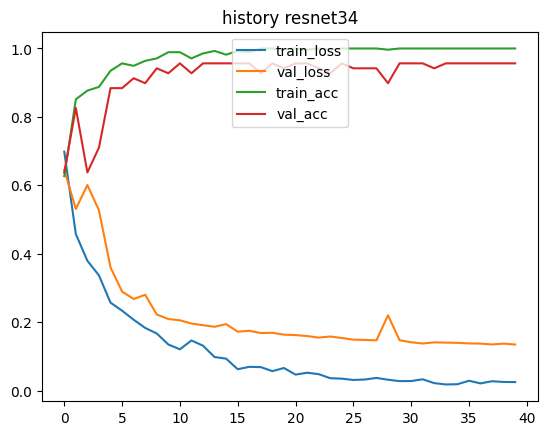

In [ ]:
plot_history(history_resnet34 , history_resnet34.columns, 'history resnet34')

### Resnet50

In [ ]:
model_resnet50 = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 165MB/s]


In [ ]:
model_resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model_resnet50.fc = nn.Linear(in_features=2048, out_features=2)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_resnet50.parameters() , lr=2e-3)

In [ ]:
history_resnet50 = train_model(train_loader, val_loader, model_resnet50, cross_entropy,optimizer,n_epoch)
history_resnet50

True


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0 Training loss = 0.656191463055818, Validation loss = 0.6882875190264937 , train_acc = 0.6268115942028986, val_acc = 0.5507246376811594


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 1 Training loss = 0.5495454029760499, Validation loss = 0.6413274951603102 , train_acc = 0.8188405797101449, val_acc = 0.6376811594202898


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 2 Training loss = 0.4908726418363875, Validation loss = 0.5277080397675002 , train_acc = 0.822463768115942, val_acc = 0.7391304347826086


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 3 Training loss = 0.4248085332953412, Validation loss = 0.4832686427710713 , train_acc = 0.855072463768116, val_acc = 0.782608695652174


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 4 Training loss = 0.3800057924312094, Validation loss = 0.43174685084301495 , train_acc = 0.8985507246376812, val_acc = 0.8115942028985508


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 5 Training loss = 0.3284461170003034, Validation loss = 0.38525621485019074 , train_acc = 0.9347826086956522, val_acc = 0.8695652173913043


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 6 Training loss = 0.3188446440558503, Validation loss = 0.34697591049083765 , train_acc = 0.9021739130434783, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 7 Training loss = 0.26668601537096326, Validation loss = 0.34330399226451264 , train_acc = 0.9420289855072463, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 8 Training loss = 0.24927081534827966, Validation loss = 0.3002173827178236 , train_acc = 0.9239130434782609, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 9 Training loss = 0.23692610730295596, Validation loss = 0.3079387213008991 , train_acc = 0.9311594202898551, val_acc = 0.8695652173913043


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 10 Training loss = 0.18598111643307452, Validation loss = 0.2706685001435487 , train_acc = 0.9637681159420289, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 11 Training loss = 0.19688169247862222, Validation loss = 0.2720338771308678 , train_acc = 0.9528985507246377, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 12 Training loss = 0.15910608872123386, Validation loss = 0.2520335571489472 , train_acc = 0.9746376811594203, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 13 Training loss = 0.1382953425248464, Validation loss = 0.2522310413744139 , train_acc = 0.9782608695652174, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 14 Training loss = 0.11747432899647865, Validation loss = 0.22880156575769617 , train_acc = 0.9818840579710145, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 15 Training loss = 0.11982257955748102, Validation loss = 0.22304637881292813 , train_acc = 0.9818840579710145, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 16 Training loss = 0.11538216536459715, Validation loss = 0.2402044085488803 , train_acc = 0.9746376811594203, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 17 Training loss = 0.09339064921157947, Validation loss = 0.2162998802420022 , train_acc = 0.9891304347826086, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 18 Training loss = 0.08984199187893799, Validation loss = 0.20778249052987582 , train_acc = 0.9927536231884058, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 19 Training loss = 0.09559624242609825, Validation loss = 0.20595022452914197 , train_acc = 0.9855072463768116, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 20 Training loss = 0.07775205395359924, Validation loss = 0.2062682572050371 , train_acc = 0.9927536231884058, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 21 Training loss = 0.06366050999233688, Validation loss = 0.20267130153766577 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 22 Training loss = 0.06679310422876607, Validation loss = 0.19638160475786182 , train_acc = 0.9891304347826086, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 23 Training loss = 0.06116664949534596, Validation loss = 0.20246421729308972 , train_acc = 0.9927536231884058, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 24 Training loss = 0.06178771844808606, Validation loss = 0.19158402279667233 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 25 Training loss = 0.044968180034471596, Validation loss = 0.18978737121906833 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 26 Training loss = 0.04662302060835603, Validation loss = 0.18069311652494513 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 27 Training loss = 0.04065095093371211, Validation loss = 0.18506926244151764 , train_acc = 0.9963768115942029, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 28 Training loss = 0.05438382524079171, Validation loss = 0.17300838599170465 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 29 Training loss = 0.03811462218130844, Validation loss = 0.18563582024712494 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 30 Training loss = 0.0541067851194437, Validation loss = 0.18371391685112662 , train_acc = 0.9891304347826086, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 31 Training loss = 0.031579710759114525, Validation loss = 0.17186220648927966 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 32 Training loss = 0.03003827865788902, Validation loss = 0.17040902246599612 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 33 Training loss = 0.046065191427866616, Validation loss = 0.1686423265415689 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 34 Training loss = 0.02623164491808933, Validation loss = 0.17941307254891464 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 35 Training loss = 0.02461861511287482, Validation loss = 0.17460701031529385 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 36 Training loss = 0.02218029891019282, Validation loss = 0.1676582019182219 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 37 Training loss = 0.02699702530019525, Validation loss = 0.17069475115209387 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 38 Training loss = 0.02309499594612398, Validation loss = 0.16679903756881106 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 39 Training loss = 0.019066476897485016, Validation loss = 0.16880081518404727 , train_acc = 1.0, val_acc = 0.9565217391304348


train_loss  val_loss  train_acc   val_acc
0     0.656191  0.688288   0.626812  0.550725
1     0.549545  0.641327   0.818841  0.637681
2     0.490873  0.527708   0.822464  0.739130
3     0.424809  0.483269   0.855072  0.782609
4     0.380006  0.431747   0.898551  0.811594
5     0.328446  0.385256   0.934783  0.869565
6     0.318845  0.346976   0.902174  0.898551
7     0.266686  0.343304   0.942029  0.913043
8     0.249271  0.300217   0.923913  0.898551
9     0.236926  0.307939   0.931159  0.869565
10    0.185981  0.270669   0.963768  0.913043
11    0.196882  0.272034   0.952899  0.898551
12    0.159106  0.252034   0.974638  0.913043
13    0.138295  0.252231   0.978261  0.898551
14    0.117474  0.228802   0.981884  0.913043
15    0.119823  0.223046   0.981884  0.913043
16    0.115382  0.240204   0.974638  0.913043
17    0.093391  0.216300   0.989130  0.927536
18    0.089842  0.207782   0.992754  0.913043
19    0.095596  0.205950   0.985507  0.942029
20    0.077752  0.206268   0.992754  0.927536
21    0.063661  0.202671   0.996377  0.942029
22    0.066793  0.196382   0.989130  0.927536
23    0.061167  0.202464   0.992754  0.927536
24    0.061788  0.191584   0.996377  0.942029
25    0.044968  0.189787   0.996377  0.942029
26    0.046623  0.180693   0.996377  0.942029
27    0.040651  0.185069   0.996377  0.927536
28    0.054384  0.173008   0.996377  0.942029
29    0.038115  0.185636   1.000000  0.942029
30    0.054107  0.183714   0.989130  0.942029
31    0.031580  0.171862   1.000000  0.942029
32    0.030038  0.170409   1.000000  0.956522
33    0.046065  0.168642   1.000000  0.956522
34    0.026232  0.179413   1.000000  0.956522
35    0.024619  0.174607   1.000000  0.942029
36    0.022180  0.167658   1.000000  0.942029
37    0.026997  0.170695   1.000000  0.942029
38    0.023095  0.166799   1.000000  0.942029
39    0.019066  0.168801   1.000000  0.956522

In [ ]:
y_true , y_pred = predict_result(model_resnet50,val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.92      1.00      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69



train_loss val_loss train_acc val_acc 

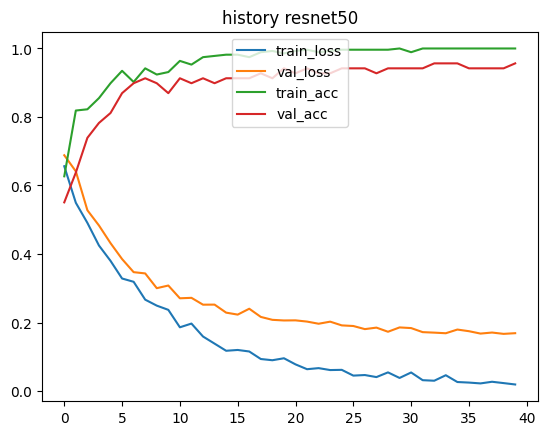

In [ ]:
plot_history(history_resnet50 , history_resnet50.columns, 'history resnet50')

### Densenet121

In [ ]:
model_densenet121 = models.densenet121(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 204MB/s]


In [ ]:
model_densenet121

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
model_densenet121.classifier = nn.Linear(in_features=1024, out_features=2)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_densenet121.parameters() , lr=2e-3)

In [ ]:
history_densenet121 = train_model(train_loader, val_loader,model_densenet121, cross_entropy,optimizer,n_epoch)
history_densenet121

True


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0 Training loss = 0.6240414415580638, Validation loss = 0.6492429885311403 , train_acc = 0.7065217391304348, val_acc = 0.6376811594202898


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 1 Training loss = 0.4977854196576105, Validation loss = 0.5009841668433037 , train_acc = 0.8333333333333334, val_acc = 0.782608695652174


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 2 Training loss = 0.42454778543417004, Validation loss = 0.48010305649992346 , train_acc = 0.8804347826086957, val_acc = 0.8260869565217391


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 3 Training loss = 0.3860611678033635, Validation loss = 0.4053786802982938 , train_acc = 0.8913043478260869, val_acc = 0.8260869565217391


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 4 Training loss = 0.34222353627716284, Validation loss = 0.3907385351865188 , train_acc = 0.9021739130434783, val_acc = 0.8695652173913043


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 5 Training loss = 0.30094391669052234, Validation loss = 0.3839460084403771 , train_acc = 0.9420289855072463, val_acc = 0.855072463768116


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 6 Training loss = 0.3013965943153354, Validation loss = 0.3400287239447884 , train_acc = 0.9021739130434783, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 7 Training loss = 0.258888377227645, Validation loss = 0.3115234776683476 , train_acc = 0.927536231884058, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 8 Training loss = 0.21373958345772565, Validation loss = 0.324850185625795 , train_acc = 0.9637681159420289, val_acc = 0.8840579710144928


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 9 Training loss = 0.216562914027684, Validation loss = 0.28908513248830603 , train_acc = 0.9565217391304348, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 10 Training loss = 0.17752349074336066, Validation loss = 0.30678018085334613 , train_acc = 0.9746376811594203, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 11 Training loss = 0.15452730914820795, Validation loss = 0.25962318004905316 , train_acc = 0.9782608695652174, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 12 Training loss = 0.15641714351764624, Validation loss = 0.2812358434649481 , train_acc = 0.967391304347826, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 13 Training loss = 0.18683802174485248, Validation loss = 0.24189501957616943 , train_acc = 0.9528985507246377, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 14 Training loss = 0.13506225356157275, Validation loss = 0.2507663027963776 , train_acc = 0.9855072463768116, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 15 Training loss = 0.12119891483714615, Validation loss = 0.23925787685573965 , train_acc = 0.9818840579710145, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 16 Training loss = 0.11073352817607962, Validation loss = 0.22352751592795053 , train_acc = 0.9891304347826086, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 17 Training loss = 0.13250531234602997, Validation loss = 0.34251673541207245 , train_acc = 0.967391304347826, val_acc = 0.8695652173913043


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 18 Training loss = 0.10821944032458292, Validation loss = 0.26023061983827234 , train_acc = 0.9891304347826086, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 19 Training loss = 0.08746985648421274, Validation loss = 0.21833425155584363 , train_acc = 0.9963768115942029, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 20 Training loss = 0.11101269117300061, Validation loss = 0.22432191432386206 , train_acc = 0.9782608695652174, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 21 Training loss = 0.10234620227761891, Validation loss = 0.21173107613256012 , train_acc = 0.9891304347826086, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 22 Training loss = 0.0697073442996412, Validation loss = 0.21559815000796664 , train_acc = 1.0, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 23 Training loss = 0.06811623955550401, Validation loss = 0.19175584203955057 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 24 Training loss = 0.05781081739975059, Validation loss = 0.1940940966208776 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 25 Training loss = 0.0657492765913839, Validation loss = 0.1970080642596535 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 26 Training loss = 0.05304713266483252, Validation loss = 0.19593122579913208 , train_acc = 1.0, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 27 Training loss = 0.06238322732025298, Validation loss = 0.1950183482705683 , train_acc = 1.0, val_acc = 0.9710144927536232


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 28 Training loss = 0.056960067887237106, Validation loss = 0.19796906325264255 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 29 Training loss = 0.03991686315208241, Validation loss = 0.19080195403185443 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 30 Training loss = 0.07613519006881161, Validation loss = 0.19782857802035153 , train_acc = 0.9927536231884058, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 31 Training loss = 0.04259258994589681, Validation loss = 0.18124557988367218 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 32 Training loss = 0.037744407231609024, Validation loss = 0.18120786245318427 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 33 Training loss = 0.03201917483322862, Validation loss = 0.18753793727660525 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 34 Training loss = 0.04873314143522926, Validation loss = 0.17831776733847632 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 35 Training loss = 0.03876557832826739, Validation loss = 0.2025919997713704 , train_acc = 1.0, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 36 Training loss = 0.04231740555901458, Validation loss = 0.174536121280297 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 37 Training loss = 0.03546165205214335, Validation loss = 0.1801815673276998 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 38 Training loss = 0.03439098143059274, Validation loss = 0.1829142467915148 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 39 Training loss = 0.042166378133106926, Validation loss = 0.1753417493208595 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


train_loss  val_loss  train_acc   val_acc
0     0.624041  0.649243   0.706522  0.637681
1     0.497785  0.500984   0.833333  0.782609
2     0.424548  0.480103   0.880435  0.826087
3     0.386061  0.405379   0.891304  0.826087
4     0.342224  0.390739   0.902174  0.869565
5     0.300944  0.383946   0.942029  0.855072
6     0.301397  0.340029   0.902174  0.913043
7     0.258888  0.311523   0.927536  0.898551
8     0.213740  0.324850   0.963768  0.884058
9     0.216563  0.289085   0.956522  0.913043
10    0.177523  0.306780   0.974638  0.898551
11    0.154527  0.259623   0.978261  0.956522
12    0.156417  0.281236   0.967391  0.913043
13    0.186838  0.241895   0.952899  0.942029
14    0.135062  0.250766   0.985507  0.942029
15    0.121199  0.239258   0.981884  0.927536
16    0.110734  0.223528   0.989130  0.942029
17    0.132505  0.342517   0.967391  0.869565
18    0.108219  0.260231   0.989130  0.927536
19    0.087470  0.218334   0.996377  0.927536
20    0.111013  0.224322   0.978261  0.942029
21    0.102346  0.211731   0.989130  0.956522
22    0.069707  0.215598   1.000000  0.927536
23    0.068116  0.191756   1.000000  0.942029
24    0.057811  0.194094   1.000000  0.956522
25    0.065749  0.197008   0.996377  0.942029
26    0.053047  0.195931   1.000000  0.927536
27    0.062383  0.195018   1.000000  0.971014
28    0.056960  0.197969   1.000000  0.942029
29    0.039917  0.190802   1.000000  0.942029
30    0.076135  0.197829   0.992754  0.956522
31    0.042593  0.181246   1.000000  0.942029
32    0.037744  0.181208   1.000000  0.942029
33    0.032019  0.187538   1.000000  0.942029
34    0.048733  0.178318   0.996377  0.942029
35    0.038766  0.202592   1.000000  0.927536
36    0.042317  0.174536   1.000000  0.956522
37    0.035462  0.180182   1.000000  0.942029
38    0.034391  0.182914   1.000000  0.942029
39    0.042166  0.175342   0.996377  0.942029

In [ ]:
y_true , y_pred = predict_result(model_densenet121, val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.91      0.97      0.94        33

    accuracy                           0.94        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69



train_loss val_loss train_acc val_acc 

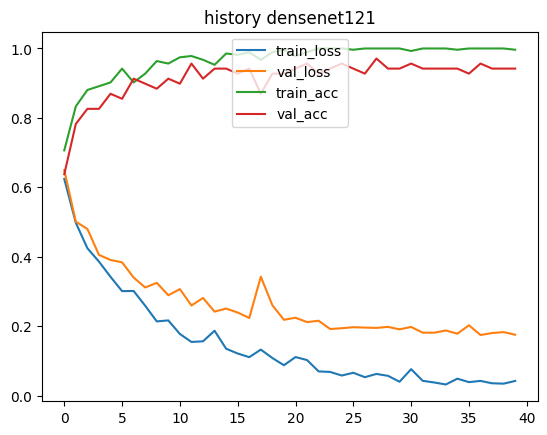

In [ ]:
plot_history(history_densenet121, history_densenet121.columns, 'history densenet121')

### Densenet201

In [ ]:
model_densenet201 = models.densenet201(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 205MB/s]


In [ ]:
model_densenet201

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
model_densenet201.classifier = nn.Linear(in_features=1920 , out_features=2)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_densenet201.parameters() , lr=2e-3)

In [ ]:
history_densenet201 = train_model(train_loader, val_loader, model_densenet201, cross_entropy,optimizer,n_epoch)
history_densenet201

True


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0 Training loss = 0.6434938769409622, Validation loss = 0.6304523625235626 , train_acc = 0.6413043478260869, val_acc = 0.7391304347826086


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 1 Training loss = 0.5285989918570587, Validation loss = 0.5608985890512881 , train_acc = 0.782608695652174, val_acc = 0.7681159420289855


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 2 Training loss = 0.43209672924401105, Validation loss = 0.5031442296677742 , train_acc = 0.8804347826086957, val_acc = 0.782608695652174


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 3 Training loss = 0.3949467747107796, Validation loss = 0.464243711768717 , train_acc = 0.8913043478260869, val_acc = 0.782608695652174


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 4 Training loss = 0.3669108722520911, Validation loss = 0.3964435609354489 , train_acc = 0.9130434782608695, val_acc = 0.855072463768116


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 5 Training loss = 0.3047278117442477, Validation loss = 0.3802495663580687 , train_acc = 0.9311594202898551, val_acc = 0.855072463768116


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 6 Training loss = 0.26582442893498187, Validation loss = 0.31303317736888275 , train_acc = 0.9601449275362319, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 7 Training loss = 0.2580893152001975, Validation loss = 0.3662156121454377 , train_acc = 0.9347826086956522, val_acc = 0.8405797101449275


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 8 Training loss = 0.2348383228847946, Validation loss = 0.30570132447325665 , train_acc = 0.9420289855072463, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 9 Training loss = 0.1925863565310188, Validation loss = 0.27713588528011157 , train_acc = 0.9710144927536232, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 10 Training loss = 0.1853699301895888, Validation loss = 0.310681421039761 , train_acc = 0.967391304347826, val_acc = 0.8840579710144928


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 11 Training loss = 0.1691079633175463, Validation loss = 0.2502433873605037 , train_acc = 0.967391304347826, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 12 Training loss = 0.1502945868001468, Validation loss = 0.2614162123721579 , train_acc = 0.9746376811594203, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 13 Training loss = 0.14519283175468445, Validation loss = 0.2351237738478011 , train_acc = 0.9746376811594203, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 14 Training loss = 0.12571027097494705, Validation loss = 0.2431950960038365 , train_acc = 0.9746376811594203, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 15 Training loss = 0.12230021906071815, Validation loss = 0.22649341195389844 , train_acc = 0.9782608695652174, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 16 Training loss = 0.11513067673945772, Validation loss = 0.22353500494922418 , train_acc = 0.9782608695652174, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 17 Training loss = 0.11938547980094301, Validation loss = 0.2748846556397452 , train_acc = 0.9855072463768116, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 18 Training loss = 0.09400939066772876, Validation loss = 0.2246792052966961 , train_acc = 0.9891304347826086, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 19 Training loss = 0.08951285794593286, Validation loss = 0.2366856701564098 , train_acc = 0.9891304347826086, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 20 Training loss = 0.08770637840464496, Validation loss = 0.20428617320198944 , train_acc = 0.9855072463768116, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 21 Training loss = 0.08173380360223245, Validation loss = 0.21485991592424503 , train_acc = 0.9927536231884058, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 22 Training loss = 0.06347518900166386, Validation loss = 0.19205847620100214 , train_acc = 0.9927536231884058, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 23 Training loss = 0.07174020260572433, Validation loss = 0.20902900959270587 , train_acc = 0.9927536231884058, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 24 Training loss = 0.07263655226299728, Validation loss = 0.22915320530317831 , train_acc = 0.9927536231884058, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 25 Training loss = 0.056129375445669975, Validation loss = 0.19463317808897598 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 26 Training loss = 0.059217321376005806, Validation loss = 0.20240254009115524 , train_acc = 0.9963768115942029, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 27 Training loss = 0.056444882698681045, Validation loss = 0.17898564558962118 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 28 Training loss = 0.049216431228147034, Validation loss = 0.23545091691008513 , train_acc = 1.0, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 29 Training loss = 0.04714719443649486, Validation loss = 0.18191024617872376 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 30 Training loss = 0.03599093703256137, Validation loss = 0.17965710627428 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 31 Training loss = 0.042965054134095924, Validation loss = 0.16663822855638422 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 32 Training loss = 0.03442257901896601, Validation loss = 0.1793385927659878 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 33 Training loss = 0.058227632653670036, Validation loss = 0.19253409891456796 , train_acc = 0.9855072463768116, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 34 Training loss = 0.03476137041613676, Validation loss = 0.1739245340012122 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 35 Training loss = 0.036777029137896454, Validation loss = 0.17419130306528963 , train_acc = 1.0, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 36 Training loss = 0.03472765610701796, Validation loss = 0.16970344060573025 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 37 Training loss = 0.02968570444246997, Validation loss = 0.17241704814891884 , train_acc = 1.0, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 38 Training loss = 0.024865903149264446, Validation loss = 0.1668735747428044 , train_acc = 1.0, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 39 Training loss = 0.02969744931096616, Validation loss = 0.18460963634045227 , train_acc = 0.9963768115942029, val_acc = 0.9420289855072463


train_loss  val_loss  train_acc   val_acc
0     0.643494  0.630452   0.641304  0.739130
1     0.528599  0.560899   0.782609  0.768116
2     0.432097  0.503144   0.880435  0.782609
3     0.394947  0.464244   0.891304  0.782609
4     0.366911  0.396444   0.913043  0.855072
5     0.304728  0.380250   0.931159  0.855072
6     0.265824  0.313033   0.960145  0.927536
7     0.258089  0.366216   0.934783  0.840580
8     0.234838  0.305701   0.942029  0.898551
9     0.192586  0.277136   0.971014  0.927536
10    0.185370  0.310681   0.967391  0.884058
11    0.169108  0.250243   0.967391  0.942029
12    0.150295  0.261416   0.974638  0.942029
13    0.145193  0.235124   0.974638  0.927536
14    0.125710  0.243195   0.974638  0.927536
15    0.122300  0.226493   0.978261  0.942029
16    0.115131  0.223535   0.978261  0.942029
17    0.119385  0.274885   0.985507  0.898551
18    0.094009  0.224679   0.989130  0.913043
19    0.089513  0.236686   0.989130  0.927536
20    0.087706  0.204286   0.985507  0.942029
21    0.081734  0.214860   0.992754  0.942029
22    0.063475  0.192058   0.992754  0.942029
23    0.071740  0.209029   0.992754  0.927536
24    0.072637  0.229153   0.992754  0.927536
25    0.056129  0.194633   0.996377  0.942029
26    0.059217  0.202403   0.996377  0.927536
27    0.056445  0.178986   1.000000  0.942029
28    0.049216  0.235451   1.000000  0.913043
29    0.047147  0.181910   1.000000  0.942029
30    0.035991  0.179657   1.000000  0.942029
31    0.042965  0.166638   1.000000  0.942029
32    0.034423  0.179339   1.000000  0.942029
33    0.058228  0.192534   0.985507  0.927536
34    0.034761  0.173925   1.000000  0.942029
35    0.036777  0.174191   1.000000  0.927536
36    0.034728  0.169703   1.000000  0.942029
37    0.029686  0.172417   1.000000  0.927536
38    0.024866  0.166874   1.000000  0.942029
39    0.029697  0.184610   0.996377  0.942029

In [ ]:
y_true, y_pred = predict_result(model_densenet201,val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.89      1.00      0.94        33

    accuracy                           0.94        69
   macro avg       0.95      0.94      0.94        69
weighted avg       0.95      0.94      0.94        69



train_loss val_loss train_acc val_acc 

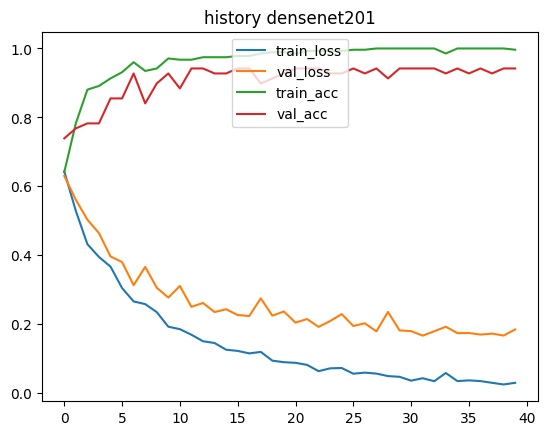

In [ ]:
plot_history(history_densenet201 , history_densenet201.columns, 'history densenet201')

### VGG16

In [ ]:
model_vgg16 = models.vgg16(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 226MB/s]


In [ ]:
model_vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
num_features = model_vgg16.classifier[6].in_features
model_vgg16.classifier[6] = nn.Linear(num_features, 2)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vgg16.parameters() , lr=2e-3)

In [ ]:
history_vgg16 = train_model(train_loader, val_loader, model_vgg16, cross_entropy,optimizer,n_epoch)
history_vgg16

True


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0 Training loss = 0.6695050165273141, Validation loss = 0.5571578352347665 , train_acc = 0.5942028985507246, val_acc = 0.7101449275362319


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 1 Training loss = 0.5191326936086019, Validation loss = 0.5057401164718296 , train_acc = 0.7210144927536232, val_acc = 0.782608695652174


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 2 Training loss = 0.5407467277153678, Validation loss = 0.47746285061905347 , train_acc = 0.7536231884057971, val_acc = 0.7681159420289855


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 3 Training loss = 0.45897020205207495, Validation loss = 0.39585164232530456 , train_acc = 0.7971014492753623, val_acc = 0.8115942028985508


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 4 Training loss = 0.41574304777642956, Validation loss = 0.37062453446180926 , train_acc = 0.8260869565217391, val_acc = 0.8405797101449275


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 5 Training loss = 0.3936173725819242, Validation loss = 0.4969881772994995 , train_acc = 0.8369565217391305, val_acc = 0.7971014492753623


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 6 Training loss = 0.35116772677587427, Validation loss = 0.39356448684913525 , train_acc = 0.8695652173913043, val_acc = 0.855072463768116


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 7 Training loss = 0.3667975325083387, Validation loss = 0.5585907645847487 , train_acc = 0.8623188405797102, val_acc = 0.7971014492753623


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 8 Training loss = 0.3779272290243619, Validation loss = 0.3081239913252817 , train_acc = 0.8333333333333334, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 9 Training loss = 0.2797037872715273, Validation loss = 0.31521050653595856 , train_acc = 0.9021739130434783, val_acc = 0.8695652173913043


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 10 Training loss = 0.3597252507140671, Validation loss = 0.34376981897630554 , train_acc = 0.8768115942028986, val_acc = 0.855072463768116


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 11 Training loss = 0.2763870606819789, Validation loss = 0.27103510974110034 , train_acc = 0.8913043478260869, val_acc = 0.8985507246376812


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 12 Training loss = 0.24604005766087683, Validation loss = 0.2901212992011637 , train_acc = 0.9057971014492754, val_acc = 0.855072463768116


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 13 Training loss = 0.28653318596922833, Validation loss = 0.26655767706857214 , train_acc = 0.8876811594202898, val_acc = 0.8695652173913043


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 14 Training loss = 0.2395433537338091, Validation loss = 0.2642849036964817 , train_acc = 0.8876811594202898, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 15 Training loss = 0.2149783569401589, Validation loss = 0.23295384235140207 , train_acc = 0.9094202898550725, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 16 Training loss = 0.19511810506599536, Validation loss = 0.6688427584974662 , train_acc = 0.9202898550724637, val_acc = 0.6956521739130435


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 17 Training loss = 0.21086818692476852, Validation loss = 0.1953793958477352 , train_acc = 0.9057971014492754, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 18 Training loss = 0.18434561227542767, Validation loss = 0.1954395239767821 , train_acc = 0.9311594202898551, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 19 Training loss = 0.25451262036095496, Validation loss = 0.28669613945311395 , train_acc = 0.894927536231884, val_acc = 0.855072463768116


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 20 Training loss = 0.1625504830609197, Validation loss = 0.1781405575465465 , train_acc = 0.9420289855072463, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 21 Training loss = 0.14991921229638916, Validation loss = 0.20406408413596774 , train_acc = 0.9420289855072463, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 22 Training loss = 0.13864575348038605, Validation loss = 0.20288792360520017 , train_acc = 0.9601449275362319, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 23 Training loss = 0.16172649376634238, Validation loss = 0.15154667339031247 , train_acc = 0.9130434782608695, val_acc = 0.9420289855072463


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 24 Training loss = 0.0922790571399357, Validation loss = 0.2323421758154164 , train_acc = 0.9710144927536232, val_acc = 0.8695652173913043


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 25 Training loss = 0.1710169697855262, Validation loss = 0.1614088161268096 , train_acc = 0.9384057971014492, val_acc = 0.9710144927536232


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 26 Training loss = 0.06944224281587462, Validation loss = 0.2166449254837589 , train_acc = 0.9855072463768116, val_acc = 0.8695652173913043


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 27 Training loss = 0.09321971993515457, Validation loss = 0.1379767637969791 , train_acc = 0.9601449275362319, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 28 Training loss = 0.07810638542624487, Validation loss = 0.5185814829867171 , train_acc = 0.9710144927536232, val_acc = 0.782608695652174


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 29 Training loss = 0.3361075667367465, Validation loss = 0.1979018855785978 , train_acc = 0.8478260869565217, val_acc = 0.927536231884058


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 30 Training loss = 0.06439909581904826, Validation loss = 0.13471171130304752 , train_acc = 0.9891304347826086, val_acc = 0.9710144927536232


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 31 Training loss = 0.051081462290839874, Validation loss = 0.19191594227500583 , train_acc = 0.9818840579710145, val_acc = 0.9130434782608695


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 32 Training loss = 0.043607156615758286, Validation loss = 0.14141857300115668 , train_acc = 0.9891304347826086, val_acc = 0.9710144927536232


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 33 Training loss = 0.03235352617027103, Validation loss = 0.15141681376574695 , train_acc = 0.9963768115942029, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 34 Training loss = 0.03362869725063227, Validation loss = 0.15659138495507446 , train_acc = 0.9963768115942029, val_acc = 0.9710144927536232


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 35 Training loss = 0.03512847774486611, Validation loss = 0.12318274108827978 , train_acc = 0.9891304347826086, val_acc = 0.9710144927536232


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 36 Training loss = 0.02176579731799986, Validation loss = 0.13164389986490857 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 37 Training loss = 0.03299414367833431, Validation loss = 0.13169425088858258 , train_acc = 0.9927536231884058, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 38 Training loss = 0.015626633512801018, Validation loss = 0.12991349320804726 , train_acc = 1.0, val_acc = 0.9565217391304348


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 39 Training loss = 0.017611988185756447, Validation loss = 0.11789564332128435 , train_acc = 0.9963768115942029, val_acc = 0.9565217391304348


train_loss  val_loss  train_acc   val_acc
0     0.669505  0.557158   0.594203  0.710145
1     0.519133  0.505740   0.721014  0.782609
2     0.540747  0.477463   0.753623  0.768116
3     0.458970  0.395852   0.797101  0.811594
4     0.415743  0.370625   0.826087  0.840580
5     0.393617  0.496988   0.836957  0.797101
6     0.351168  0.393564   0.869565  0.855072
7     0.366798  0.558591   0.862319  0.797101
8     0.377927  0.308124   0.833333  0.898551
9     0.279704  0.315211   0.902174  0.869565
10    0.359725  0.343770   0.876812  0.855072
11    0.276387  0.271035   0.891304  0.898551
12    0.246040  0.290121   0.905797  0.855072
13    0.286533  0.266558   0.887681  0.869565
14    0.239543  0.264285   0.887681  0.913043
15    0.214978  0.232954   0.909420  0.927536
16    0.195118  0.668843   0.920290  0.695652
17    0.210868  0.195379   0.905797  0.956522
18    0.184346  0.195440   0.931159  0.956522
19    0.254513  0.286696   0.894928  0.855072
20    0.162550  0.178141   0.942029  0.956522
21    0.149919  0.204064   0.942029  0.913043
22    0.138646  0.202888   0.960145  0.927536
23    0.161726  0.151547   0.913043  0.942029
24    0.092279  0.232342   0.971014  0.869565
25    0.171017  0.161409   0.938406  0.971014
26    0.069442  0.216645   0.985507  0.869565
27    0.093220  0.137977   0.960145  0.956522
28    0.078106  0.518581   0.971014  0.782609
29    0.336108  0.197902   0.847826  0.927536
30    0.064399  0.134712   0.989130  0.971014
31    0.051081  0.191916   0.981884  0.913043
32    0.043607  0.141419   0.989130  0.971014
33    0.032354  0.151417   0.996377  0.956522
34    0.033629  0.156591   0.996377  0.971014
35    0.035128  0.123183   0.989130  0.971014
36    0.021766  0.131644   1.000000  0.956522
37    0.032994  0.131694   0.992754  0.956522
38    0.015627  0.129913   1.000000  0.956522
39    0.017612  0.117896   0.996377  0.956522

In [ ]:
y_true, y_pred = predict_result(model_vgg16,val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.94      0.97      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69



train_loss val_loss train_acc val_acc 

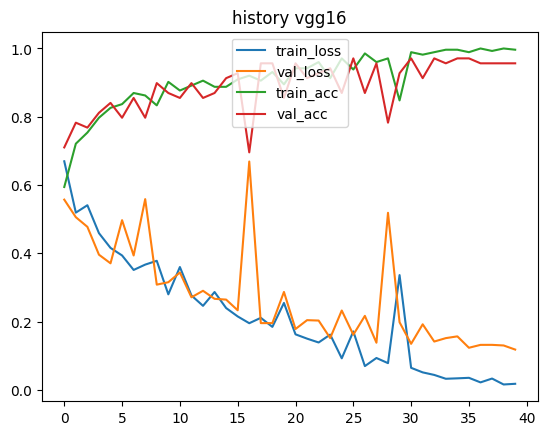

In [ ]:
plot_history(history_vgg16 , history_vgg16.columns,'history vgg16')

## Visual Accuracy and Loss Trend

### acc

In [ ]:
# train_acc
train_acc = pd.DataFrame({
    'resnet34' : history_resnet34['train_acc'].values ,
    'resnet50' : history_resnet50['train_acc'].values ,
    'densenet121' : history_densenet121['train_acc'].values ,
    'densenet201' : history_densenet201['train_acc'].values ,
    'vgg16' : history_vgg16['train_acc'].values
})

train_acc

resnet34  resnet50  densenet121  densenet201     vgg16
0   0.626812  0.626812     0.706522     0.641304  0.594203
1   0.851449  0.818841     0.833333     0.782609  0.721014
2   0.876812  0.822464     0.880435     0.880435  0.753623
3   0.887681  0.855072     0.891304     0.891304  0.797101
4   0.934783  0.898551     0.902174     0.913043  0.826087
5   0.956522  0.934783     0.942029     0.931159  0.836957
6   0.949275  0.902174     0.902174     0.960145  0.869565
7   0.963768  0.942029     0.927536     0.934783  0.862319
8   0.971014  0.923913     0.963768     0.942029  0.833333
9   0.989130  0.931159     0.956522     0.971014  0.902174
10  0.989130  0.963768     0.974638     0.967391  0.876812
11  0.971014  0.952899     0.978261     0.967391  0.891304
12  0.985507  0.974638     0.967391     0.974638  0.905797
13  0.992754  0.978261     0.952899     0.974638  0.887681
14  0.981884  0.981884     0.985507     0.974638  0.887681
15  0.992754  0.981884     0.981884     0.978261  0.909420
16  0.989130  0.974638     0.989130     0.978261  0.920290
17  1.000000  0.989130     0.967391     0.985507  0.905797
18  1.000000  0.992754     0.989130     0.989130  0.931159
19  0.996377  0.985507     0.996377     0.989130  0.894928
20  1.000000  0.992754     0.978261     0.985507  0.942029
21  0.996377  0.996377     0.989130     0.992754  0.942029
22  1.000000  0.989130     1.000000     0.992754  0.960145
23  0.996377  0.992754     1.000000     0.992754  0.913043
24  1.000000  0.996377     1.000000     0.992754  0.971014
25  1.000000  0.996377     0.996377     0.996377  0.938406
26  1.000000  0.996377     1.000000     0.996377  0.985507
27  1.000000  0.996377     1.000000     1.000000  0.960145
28  0.996377  0.996377     1.000000     1.000000  0.971014
29  1.000000  1.000000     1.000000     1.000000  0.847826
30  1.000000  0.989130     0.992754     1.000000  0.989130
31  1.000000  1.000000     1.000000     1.000000  0.981884
32  1.000000  1.000000     1.000000     1.000000  0.989130
33  1.000000  1.000000     1.000000     0.985507  0.996377
34  1.000000  1.000000     0.996377     1.000000  0.996377
35  1.000000  1.000000     1.000000     1.000000  0.989130
36  1.000000  1.000000     1.000000     1.000000  1.000000
37  1.000000  1.000000     1.000000     1.000000  0.992754
38  1.000000  1.000000     1.000000     1.000000  1.000000
39  1.000000  1.000000     0.996377     0.996377  0.996377

In [ ]:
# val_acc
val_acc = pd.DataFrame({
    'resnet34' : history_resnet34['val_acc'].values ,
    'resnet50' : history_resnet50['val_acc'].values ,
    'densenet121' : history_densenet121['val_acc'].values ,
    'densenet201' : history_densenet201['val_acc'].values ,
    'vgg16' : history_vgg16['val_acc'].values
})

val_acc

resnet34  resnet50  densenet121  densenet201     vgg16
0   0.637681  0.550725     0.637681     0.739130  0.710145
1   0.826087  0.637681     0.782609     0.768116  0.782609
2   0.637681  0.739130     0.826087     0.782609  0.768116
3   0.710145  0.782609     0.826087     0.782609  0.811594
4   0.884058  0.811594     0.869565     0.855072  0.840580
5   0.884058  0.869565     0.855072     0.855072  0.797101
6   0.913043  0.898551     0.913043     0.927536  0.855072
7   0.898551  0.913043     0.898551     0.840580  0.797101
8   0.942029  0.898551     0.884058     0.898551  0.898551
9   0.927536  0.869565     0.913043     0.927536  0.869565
10  0.956522  0.913043     0.898551     0.884058  0.855072
11  0.927536  0.898551     0.956522     0.942029  0.898551
12  0.956522  0.913043     0.913043     0.942029  0.855072
13  0.956522  0.898551     0.942029     0.927536  0.869565
14  0.956522  0.913043     0.942029     0.927536  0.913043
15  0.956522  0.913043     0.927536     0.942029  0.927536
16  0.956522  0.913043     0.942029     0.942029  0.695652
17  0.927536  0.927536     0.869565     0.898551  0.956522
18  0.956522  0.913043     0.927536     0.913043  0.956522
19  0.942029  0.942029     0.927536     0.927536  0.855072
20  0.956522  0.927536     0.942029     0.942029  0.956522
21  0.956522  0.942029     0.956522     0.942029  0.913043
22  0.942029  0.927536     0.927536     0.942029  0.927536
23  0.927536  0.927536     0.942029     0.927536  0.942029
24  0.956522  0.942029     0.956522     0.927536  0.869565
25  0.942029  0.942029     0.942029     0.942029  0.971014
26  0.942029  0.942029     0.927536     0.927536  0.869565
27  0.942029  0.927536     0.971014     0.942029  0.956522
28  0.898551  0.942029     0.942029     0.913043  0.782609
29  0.956522  0.942029     0.942029     0.942029  0.927536
30  0.956522  0.942029     0.956522     0.942029  0.971014
31  0.956522  0.942029     0.942029     0.942029  0.913043
32  0.942029  0.956522     0.942029     0.942029  0.971014
33  0.956522  0.956522     0.942029     0.927536  0.956522
34  0.956522  0.956522     0.942029     0.942029  0.971014
35  0.956522  0.942029     0.927536     0.927536  0.971014
36  0.956522  0.942029     0.956522     0.942029  0.956522
37  0.956522  0.942029     0.942029     0.927536  0.956522
38  0.956522  0.942029     0.942029     0.942029  0.956522
39  0.956522  0.956522     0.942029     0.942029  0.956522

In [ ]:
color_model = {
    'resnet34' : 'red',
    'resnet50' : 'orange',
    'densenet121' : 'blue',
    'densenet201' : 'green',
    'vgg16' : 'brown'
}

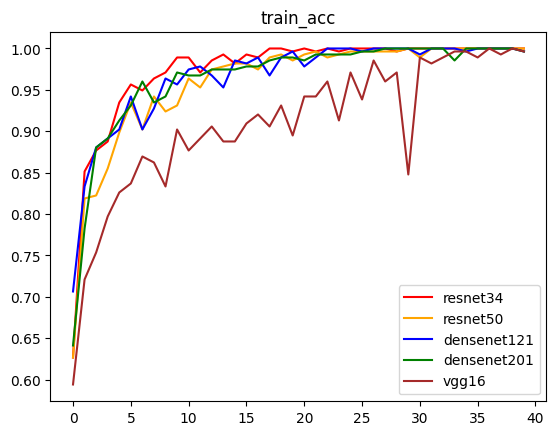

In [ ]:
for model_name in train_acc.columns :
  plt.plot(train_acc.index ,train_acc[model_name] , label = model_name, color=color_model[model_name])

plt.title('train_acc')
plt.legend(loc = 'lower right')

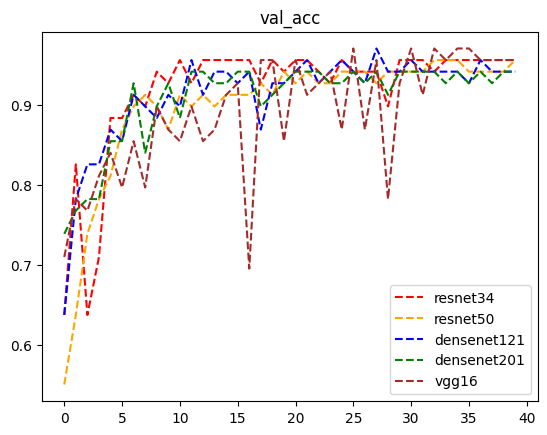

In [ ]:
for model_name in val_acc.columns :
  plt.plot(val_acc.index ,val_acc[model_name], linestyle='--' , label = model_name , color=color_model[model_name])

plt.title('val_acc')
plt.legend(loc = 'lower right')

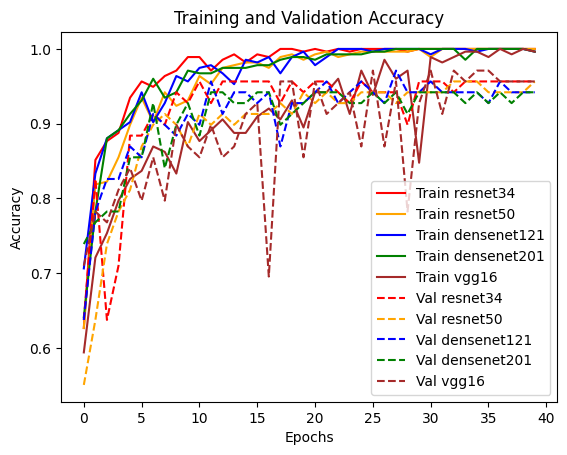

In [ ]:
fig, ax = plt.subplots()

for model_name in train_acc.columns:
    ax.plot(train_acc.index, train_acc[model_name], label=f'Train {model_name}',color=color_model[model_name])

for model_name in val_acc.columns:
    ax.plot(val_acc.index, val_acc[model_name], linestyle='--', label=f'Val {model_name}',color=color_model[model_name])

ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy')
ax.legend(loc='lower right')

plt.show()

### loss

In [ ]:
# train_loss
train_loss = pd.DataFrame({
    'resnet34' : history_resnet34['train_loss'].values ,
    'resnet50' : history_resnet50['train_loss'].values ,
    'densenet121' : history_densenet121['train_loss'].values ,
    'densenet201' : history_densenet201['train_loss'].values ,
    'vgg16' : history_vgg16['train_loss'].values
})

train_loss

resnet34  resnet50  densenet121  densenet201     vgg16
0   0.698493  0.656191     0.624041     0.643494  0.669505
1   0.457532  0.549545     0.497785     0.528599  0.519133
2   0.379371  0.490873     0.424548     0.432097  0.540747
3   0.336694  0.424809     0.386061     0.394947  0.458970
4   0.257009  0.380006     0.342224     0.366911  0.415743
5   0.233477  0.328446     0.300944     0.304728  0.393617
6   0.207161  0.318845     0.301397     0.265824  0.351168
7   0.183110  0.266686     0.258888     0.258089  0.366798
8   0.166835  0.249271     0.213740     0.234838  0.377927
9   0.134725  0.236926     0.216563     0.192586  0.279704
10  0.120624  0.185981     0.177523     0.185370  0.359725
11  0.146457  0.196882     0.154527     0.169108  0.276387
12  0.131127  0.159106     0.156417     0.150295  0.246040
13  0.098008  0.138295     0.186838     0.145193  0.286533
14  0.093286  0.117474     0.135062     0.125710  0.239543
15  0.062413  0.119823     0.121199     0.122300  0.214978
16  0.069378  0.115382     0.110734     0.115131  0.195118
17  0.068572  0.093391     0.132505     0.119385  0.210868
18  0.056775  0.089842     0.108219     0.094009  0.184346
19  0.065948  0.095596     0.087470     0.089513  0.254513
20  0.046648  0.077752     0.111013     0.087706  0.162550
21  0.052137  0.063661     0.102346     0.081734  0.149919
22  0.048050  0.066793     0.069707     0.063475  0.138646
23  0.036134  0.061167     0.068116     0.071740  0.161726
24  0.034831  0.061788     0.057811     0.072637  0.092279
25  0.031020  0.044968     0.065749     0.056129  0.171017
26  0.032325  0.046623     0.053047     0.059217  0.069442
27  0.036970  0.040651     0.062383     0.056445  0.093220
28  0.031671  0.054384     0.056960     0.049216  0.078106
29  0.027580  0.038115     0.039917     0.047147  0.336108
30  0.027852  0.054107     0.076135     0.035991  0.064399
31  0.032923  0.031580     0.042593     0.042965  0.051081
32  0.021747  0.030038     0.037744     0.034423  0.043607
33  0.017802  0.046065     0.032019     0.058228  0.032354
34  0.018502  0.026232     0.048733     0.034761  0.033629
35  0.028634  0.024619     0.038766     0.036777  0.035128
36  0.020983  0.022180     0.042317     0.034728  0.021766
37  0.027319  0.026997     0.035462     0.029686  0.032994
38  0.025177  0.023095     0.034391     0.024866  0.015627
39  0.024757  0.019066     0.042166     0.029697  0.017612

In [ ]:
# val_loss
val_loss = pd.DataFrame({
    'resnet34' : history_resnet34['val_loss'].values ,
    'resnet50' : history_resnet50['val_loss'].values ,
    'densenet121' : history_densenet121['val_loss'].values ,
    'densenet201' : history_densenet201['val_loss'].values ,
    'vgg16' : history_vgg16['val_loss'].values
})

val_loss

resnet34  resnet50  densenet121  densenet201     vgg16
0   0.645085  0.688288     0.649243     0.630452  0.557158
1   0.530796  0.641327     0.500984     0.560899  0.505740
2   0.600861  0.527708     0.480103     0.503144  0.477463
3   0.526931  0.483269     0.405379     0.464244  0.395852
4   0.360171  0.431747     0.390739     0.396444  0.370625
5   0.289377  0.385256     0.383946     0.380250  0.496988
6   0.267694  0.346976     0.340029     0.313033  0.393564
7   0.279966  0.343304     0.311523     0.366216  0.558591
8   0.222495  0.300217     0.324850     0.305701  0.308124
9   0.209183  0.307939     0.289085     0.277136  0.315211
10  0.205387  0.270669     0.306780     0.310681  0.343770
11  0.196008  0.272034     0.259623     0.250243  0.271035
12  0.191008  0.252034     0.281236     0.261416  0.290121
13  0.186530  0.252231     0.241895     0.235124  0.266558
14  0.194233  0.228802     0.250766     0.243195  0.264285
15  0.172155  0.223046     0.239258     0.226493  0.232954
16  0.174817  0.240204     0.223528     0.223535  0.668843
17  0.168151  0.216300     0.342517     0.274885  0.195379
18  0.168927  0.207782     0.260231     0.224679  0.195440
19  0.163466  0.205950     0.218334     0.236686  0.286696
20  0.162182  0.206268     0.224322     0.204286  0.178141
21  0.159399  0.202671     0.211731     0.214860  0.204064
22  0.154855  0.196382     0.215598     0.192058  0.202888
23  0.157950  0.202464     0.191756     0.209029  0.151547
24  0.153778  0.191584     0.194094     0.229153  0.232342
25  0.148857  0.189787     0.197008     0.194633  0.161409
26  0.147961  0.180693     0.195931     0.202403  0.216645
27  0.146782  0.185069     0.195018     0.178986  0.137977
28  0.220053  0.173008     0.197969     0.235451  0.518581
29  0.147315  0.185636     0.190802     0.181910  0.197902
30  0.141223  0.183714     0.197829     0.179657  0.134712
31  0.137612  0.171862     0.181246     0.166638  0.191916
32  0.140923  0.170409     0.181208     0.179339  0.141419
33  0.140183  0.168642     0.187538     0.192534  0.151417
34  0.139525  0.179413     0.178318     0.173925  0.156591
35  0.137822  0.174607     0.202592     0.174191  0.123183
36  0.137278  0.167658     0.174536     0.169703  0.131644
37  0.134791  0.170695     0.180182     0.172417  0.131694
38  0.137224  0.166799     0.182914     0.166874  0.129913
39  0.134600  0.168801     0.175342     0.184610  0.117896

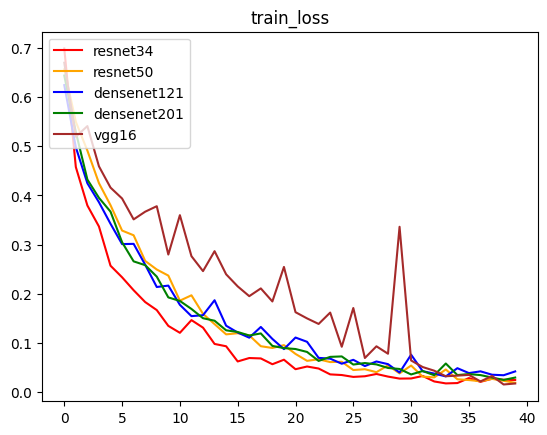

In [ ]:
for model_name in train_loss.columns :
  plt.plot(train_loss.index ,train_loss[model_name] , label = model_name, color=color_model[model_name])

plt.title('train_loss')
plt.legend(loc = 'upper left')

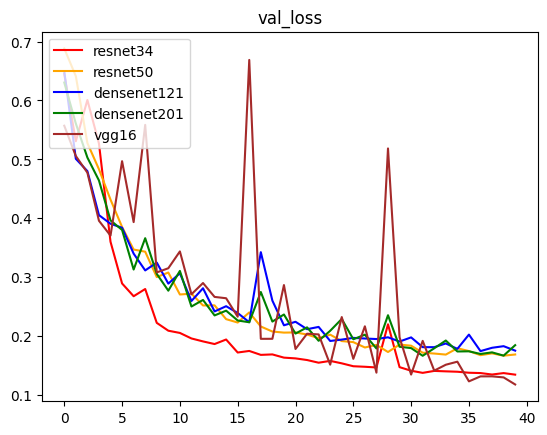

In [ ]:
for model_name in val_loss.columns :
  plt.plot(val_loss.index ,val_loss[model_name] , label = model_name, color=color_model[model_name])

plt.title('val_loss')
plt.legend(loc = 'upper left')

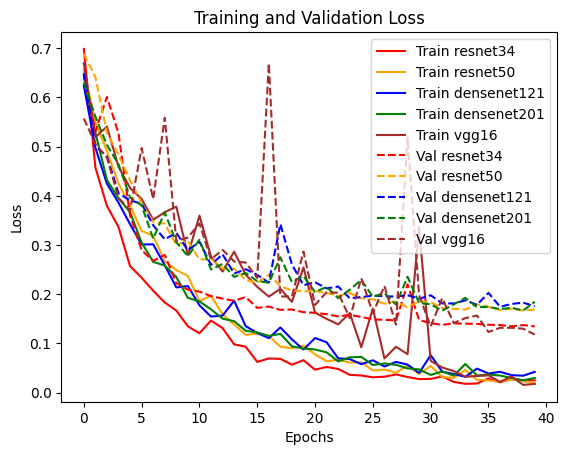

In [ ]:
fig, ax = plt.subplots()

for model_name in train_loss.columns:
    ax.plot(train_loss.index, train_loss[model_name], label=f'Train {model_name}',color=color_model[model_name])

for model_name in val_loss.columns:
    ax.plot(val_loss.index, val_loss[model_name], linestyle='--', label=f'Val {model_name}',color=color_model[model_name])

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss')
ax.legend(loc='upper right')


plt.show()

# Analyze Model

## Function : analyze

In [ ]:
def display_confusionMatrix(y_true, y_pred) :
  matrix = metrics.confusion_matrix(y_true, y_pred)

  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Healthy', 'Patient'])

  cm_display.plot()
  plt.show()

In [ ]:
def tensor_to_numpy(tensor_image) :
  tensor_image_cpu = tensor_image.cpu()
  numpy_image = tensor_image_cpu.permute(1,2,0).numpy()
  return numpy_image

In [ ]:
give_class = lambda is_PD : "PD" if is_PD else "H"

In [ ]:
def display_wrong_output(model, loader) :
  gpu = torch.cuda.is_available()
  print(gpu)

  if gpu : model.cuda()

  model.eval()

  y_true = []
  y_pred = []

  false_images = []
  false_outputs = []

  for images , labels in tqdm(loader) :
    if gpu :
      images , labels = images.cuda() , labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
    for i in range(len(labels)) :
      if not yt[i] == yp[i] :
        # plt.imshow(images[i])
        # print(images[i])
        false_images.append(images[i])
        false_outputs.append([yt[i] , yp[i]])

  # print(false_images)
  print(classification_report(y_true , y_pred))

  plt.figure(figsize=(15,9))


  for i in range(len(false_outputs)) :
    actual, predicted = false_outputs[i]
    tensor_image = false_images[i]
    plt.subplot(1,len(false_outputs),i+1)
    plt.imshow(tensor_to_numpy(tensor_image))
    plt.title(f"{give_class(actual)} , predict:{give_class(predicted)}")
    plt.axis('off')

## analyze

### resnet34

In [ ]:
y_true, y_pred = predict_result(model_resnet34 , val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.94      0.97      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69



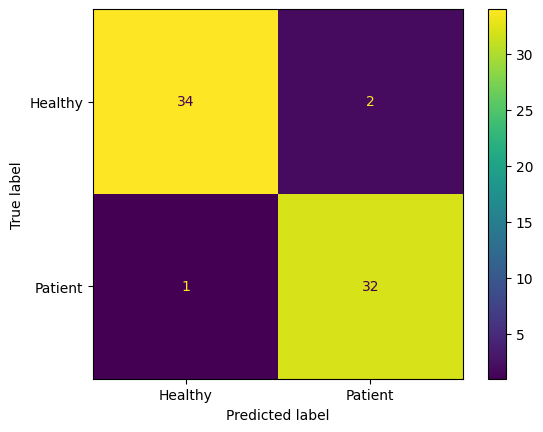

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.94      0.97      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69



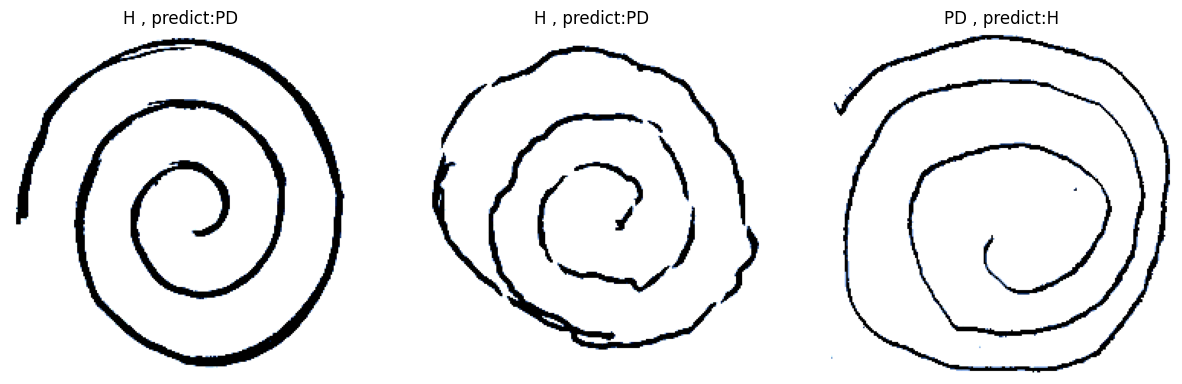

In [ ]:
display_wrong_output(model_resnet34 , val_loader)

### resnet50

In [ ]:
y_true, y_pred = predict_result(model_resnet50 , val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.92      1.00      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69



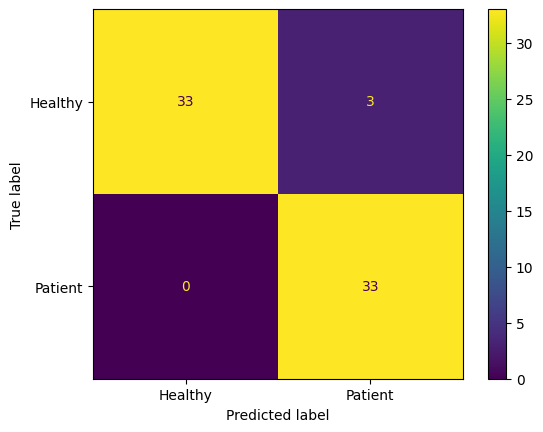

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.92      1.00      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69



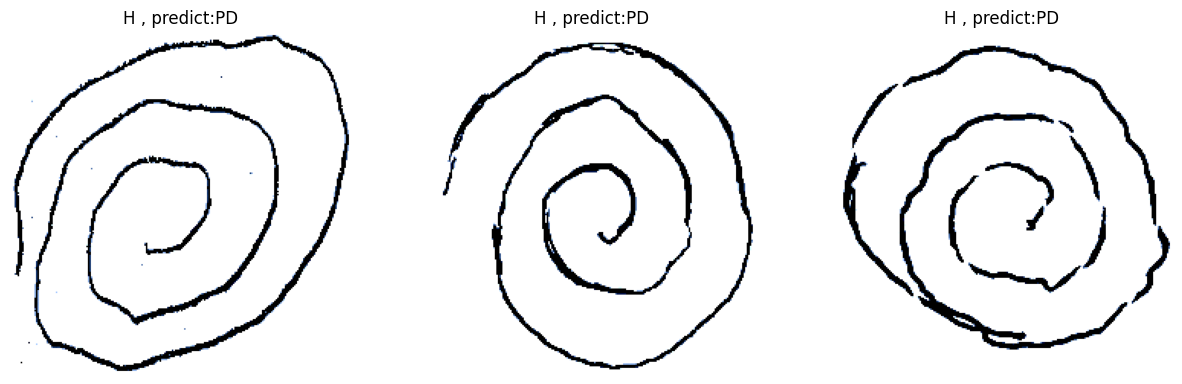

In [ ]:
display_wrong_output(model_resnet50 , val_loader)

### densenet121

In [ ]:
y_true, y_pred = predict_result(model_densenet121 , val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.91      0.97      0.94        33

    accuracy                           0.94        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69



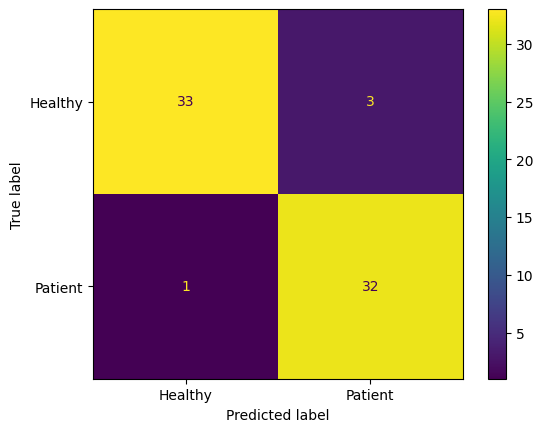

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.91      0.97      0.94        33

    accuracy                           0.94        69
   macro avg       0.94      0.94      0.94        69
weighted avg       0.94      0.94      0.94        69



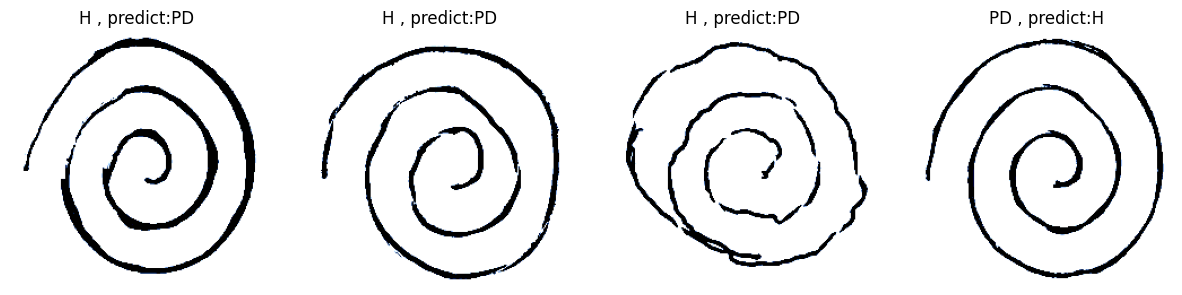

In [ ]:
display_wrong_output(model_densenet121 , val_loader)

### densenet201

In [ ]:
y_true, y_pred = predict_result(model_densenet201 , val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.89      1.00      0.94        33

    accuracy                           0.94        69
   macro avg       0.95      0.94      0.94        69
weighted avg       0.95      0.94      0.94        69



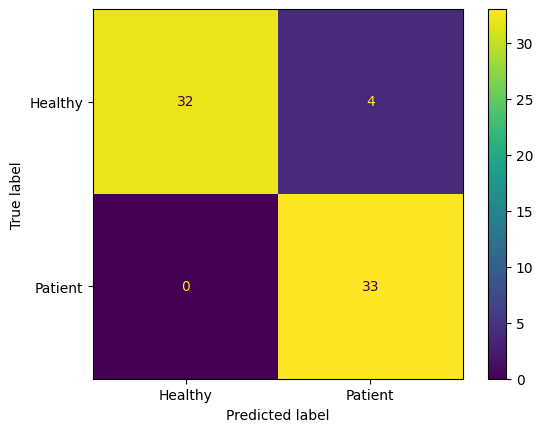

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        36
           1       0.89      1.00      0.94        33

    accuracy                           0.94        69
   macro avg       0.95      0.94      0.94        69
weighted avg       0.95      0.94      0.94        69



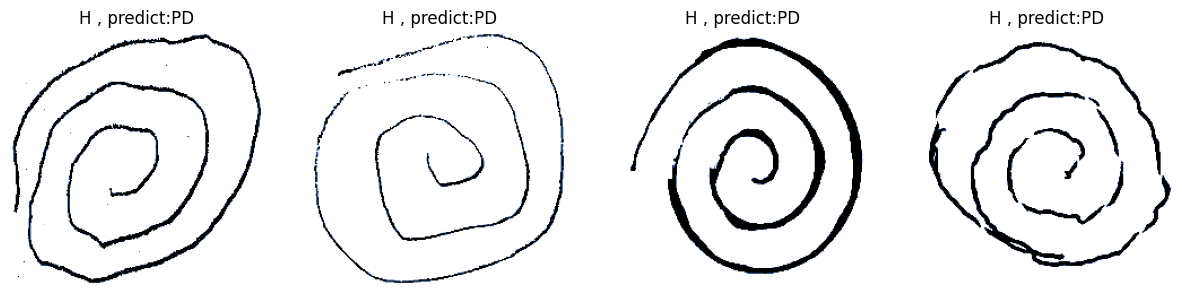

In [ ]:
display_wrong_output(model_densenet201 , val_loader)

### vgg16

In [ ]:
y_true, y_pred = predict_result(model_vgg16 , val_loader)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.94      0.97      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69



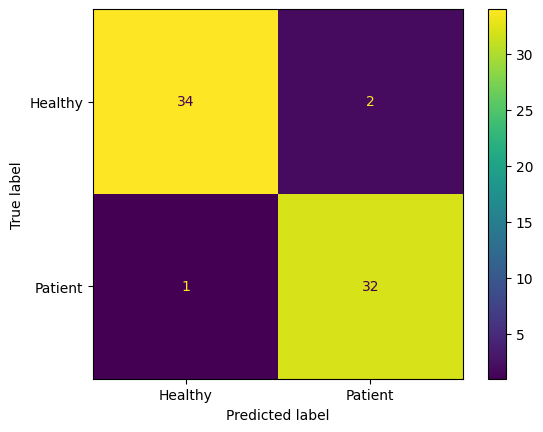

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/3 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.94      0.97      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69



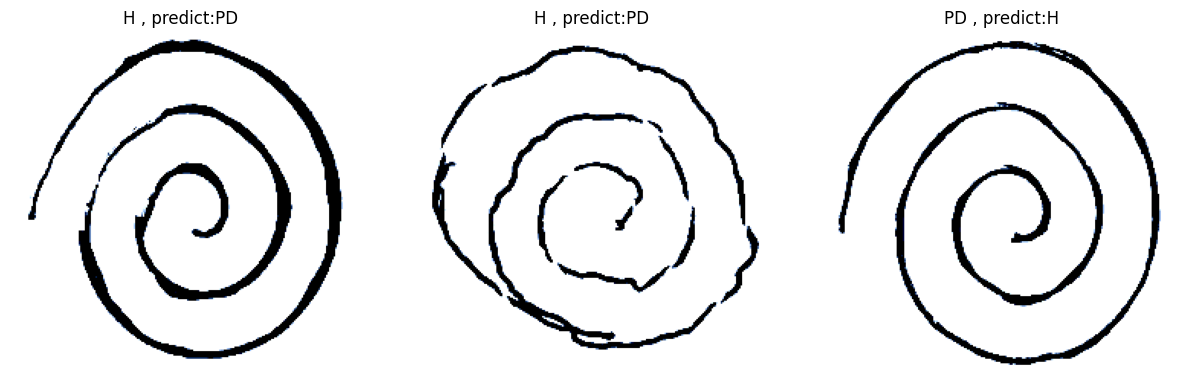

In [ ]:
display_wrong_output(model_vgg16 , val_loader)

# Test

In [ ]:
test_data = datasets.ImageFolder("data/test/" , transform=val_transform)

In [ ]:
test_loader = DataLoader(test_data , batch_size=32 , shuffle = False)

In [ ]:
test_loader.dataset

Dataset ImageFolder
    Number of datapoints: 20
    Root location: data/test/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

## analyze

### resnet34

In [ ]:
y_true, y_pred = predict_result(model_resnet34 , test_loader)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



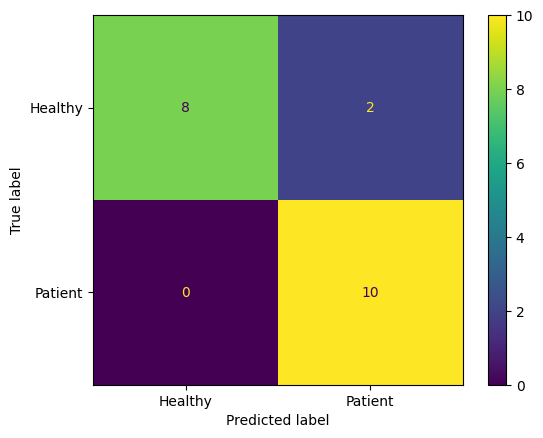

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



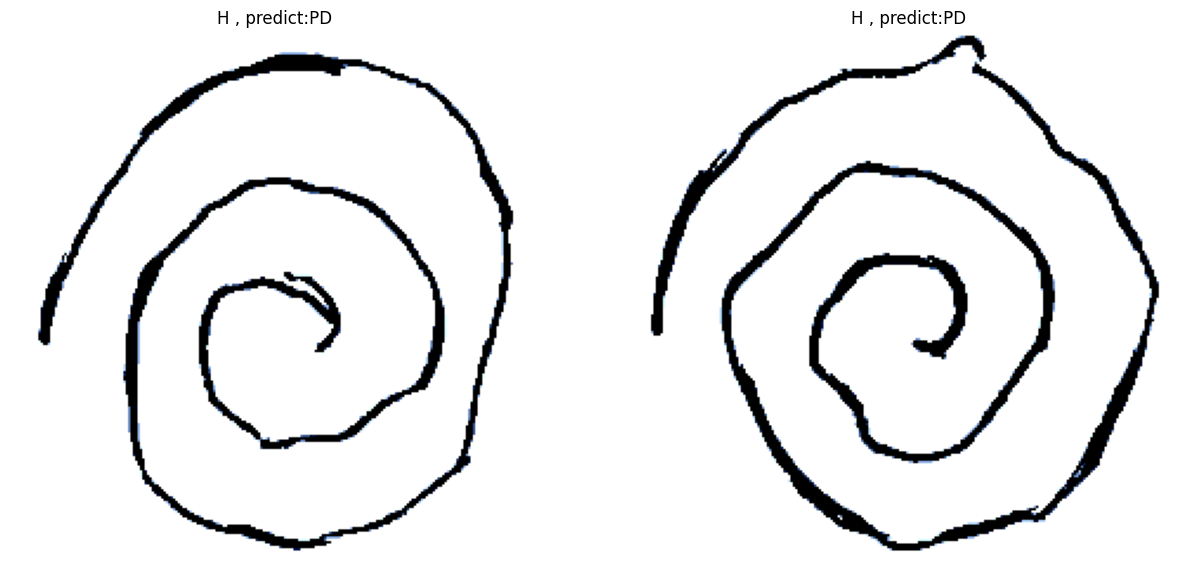

In [ ]:
display_wrong_output(model_resnet34 , test_loader)

### resnet50

In [ ]:
y_true, y_pred = predict_result(model_resnet50 , test_loader)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



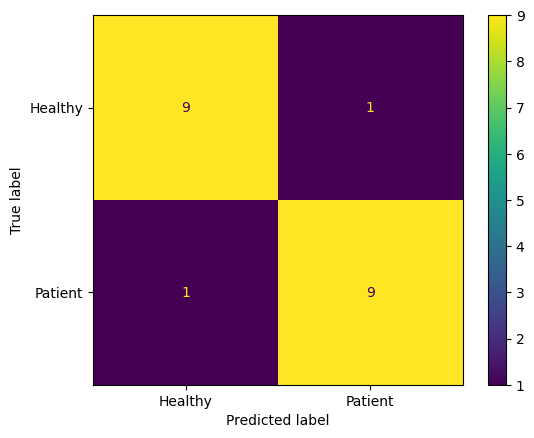

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



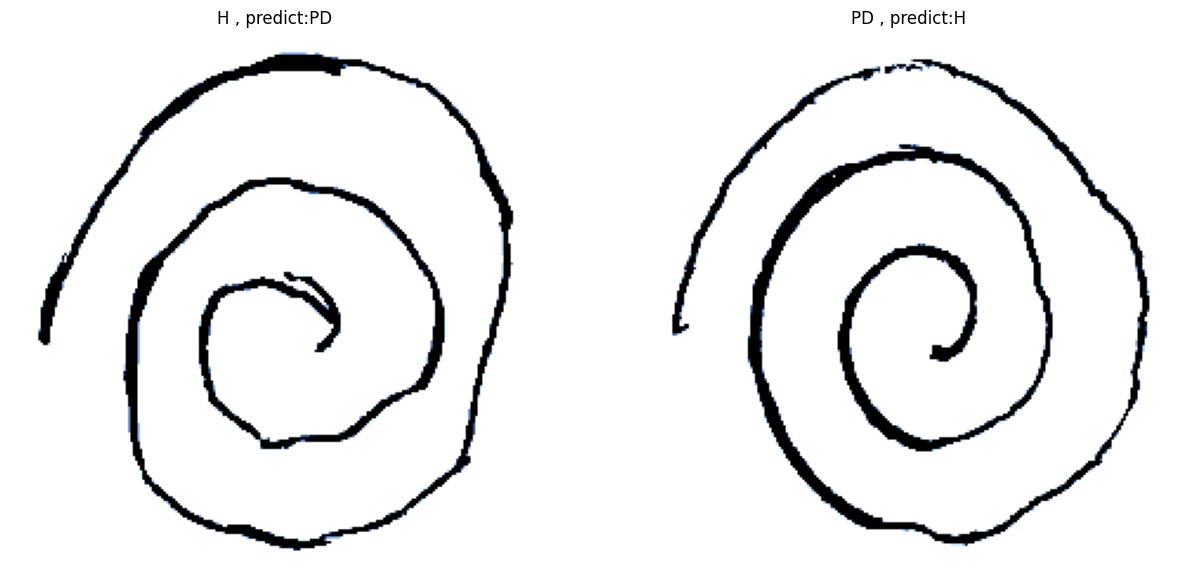

In [ ]:
display_wrong_output(model_resnet50 , test_loader)

### densenet121

In [ ]:
y_true, y_pred = predict_result(model_densenet121 , test_loader)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



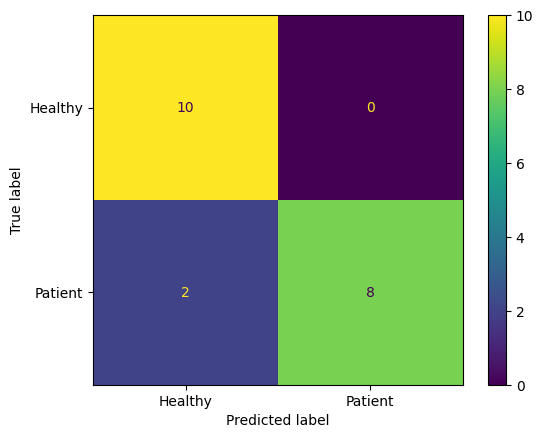

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



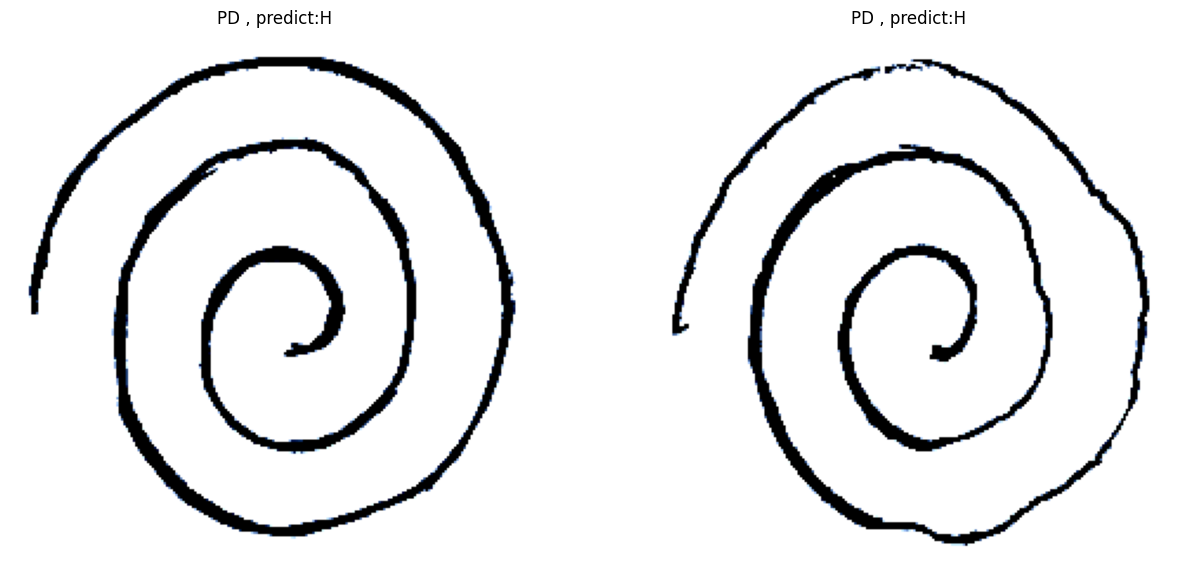

In [ ]:
display_wrong_output(model_densenet121 , test_loader)

### densenet201

In [ ]:
y_true, y_pred = predict_result(model_densenet201 , test_loader)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



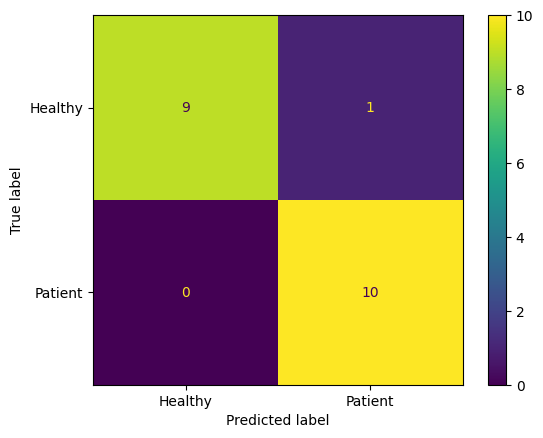

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



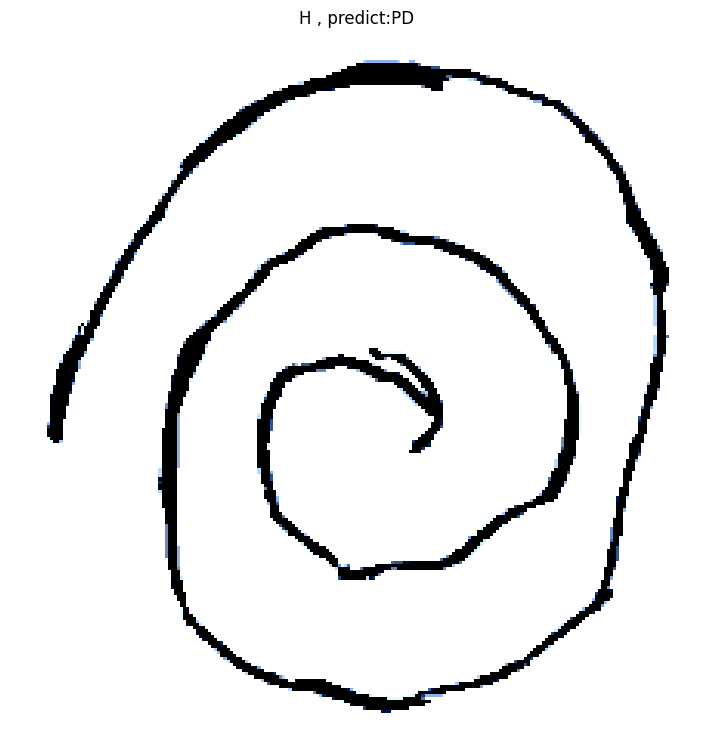

In [ ]:
display_wrong_output(model_densenet201 , test_loader)

### vgg16

In [ ]:
y_true, y_pred = predict_result(model_vgg16 , test_loader)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



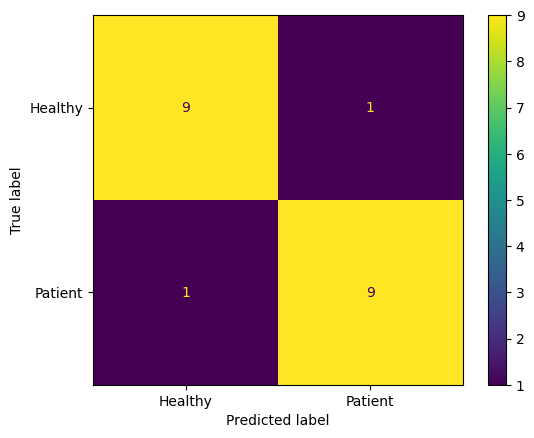

In [ ]:
display_confusionMatrix(y_true,y_pred)

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



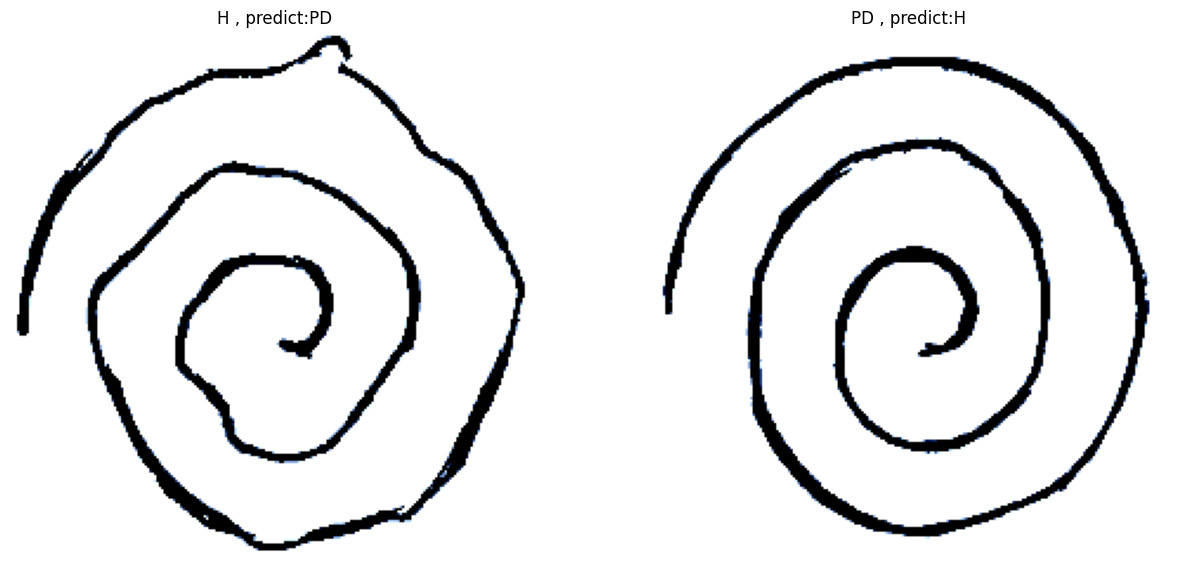

In [ ]:
display_wrong_output(model_vgg16 , test_loader)

# Save Model

In [ ]:
torch.save( model_densenet121.state_dict(), 'model_densenet121.pth')

In [ ]:
torch.save( model_densenet201.state_dict(), 'model_densenet201.pth')

In [ ]:
torch.save( model_resnet34.state_dict(), 'model_resnet34.pth')

In [ ]:
torch.save( model_resnet50.state_dict(), 'model_resnet50.pth')

In [ ]:
torch.save( model_vgg16.state_dict(), 'model_vgg16.pth')

# My own testset

## setting

In [ ]:
os.makedirs('myTest/Healthy')
os.makedirs('myTest/Patient')

In [ ]:
myTest_data = datasets.ImageFolder("myTest/" , transform=val_transform)

In [ ]:
myTest_loader = DataLoader(myTest_data , batch_size=32 , shuffle = False)

In [ ]:
myTest_loader.dataset

Dataset ImageFolder
    Number of datapoints: 21
    Root location: myTest/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [ ]:
def eval_myTest(model, loader) :
  gpu = torch.cuda.is_available()
  print(gpu)

  if gpu : model.cuda()

  model.eval()

  y_true = []
  y_pred = []

  false_images = []
  false_outputs = []

  for images , labels in tqdm(loader) :
    if gpu :
      images , labels = images.cuda() , labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
    for i in range(len(labels)) :
        # plt.imshow(images[i])
        # print(images[i])
        false_images.append(images[i])
        false_outputs.append([yt[i] , yp[i]])

  # print(false_images)
  print(classification_report(y_true , y_pred))

  plt.figure(figsize=(15,9))

  for i in range(len(false_outputs)) :
    actual, predicted = false_outputs[i]
    tensor_image = false_images[i]
    plt.subplot(2,12,i+1)
    plt.imshow(tensor_to_numpy(tensor_image))
    plt.title(f"{give_class(actual)} -> {give_class(predicted)}")
    plt.axis('off')
  return y_true, y_pred

## resnet34

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        20
           1       0.06      1.00      0.12         1

    accuracy                           0.29        21
   macro avg       0.53      0.62      0.26        21
weighted avg       0.96      0.29      0.39        21



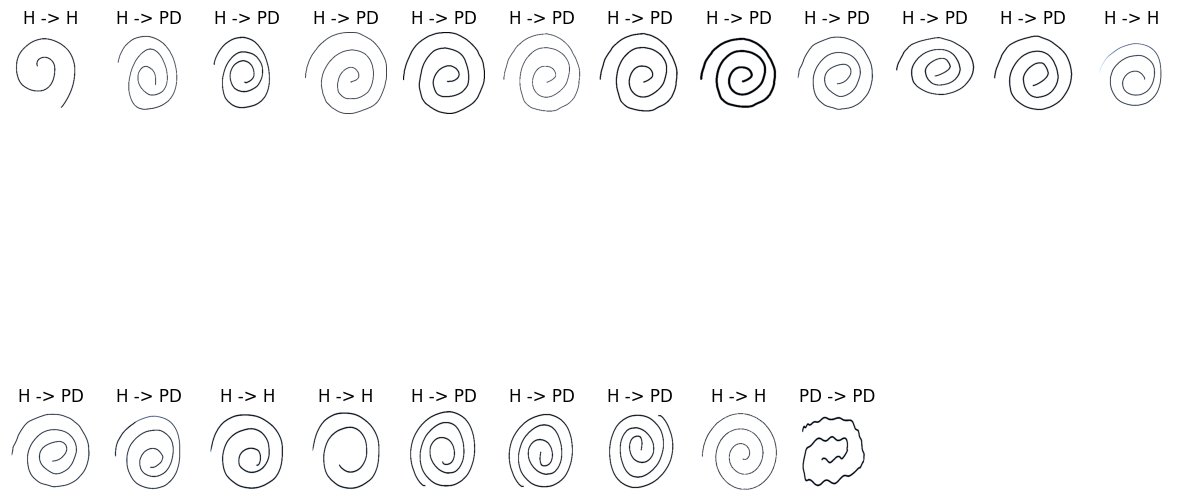

In [ ]:
y_true,y_pred = eval_myTest(model_resnet34,myTest_loader)

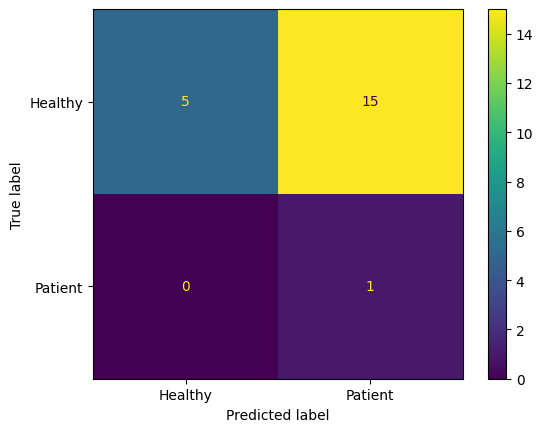

In [ ]:
display_confusionMatrix(y_true,y_pred)

## resnet50

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       0.05      1.00      0.10         1

    accuracy                           0.10        21
   macro avg       0.53      0.53      0.10        21
weighted avg       0.95      0.10      0.10        21



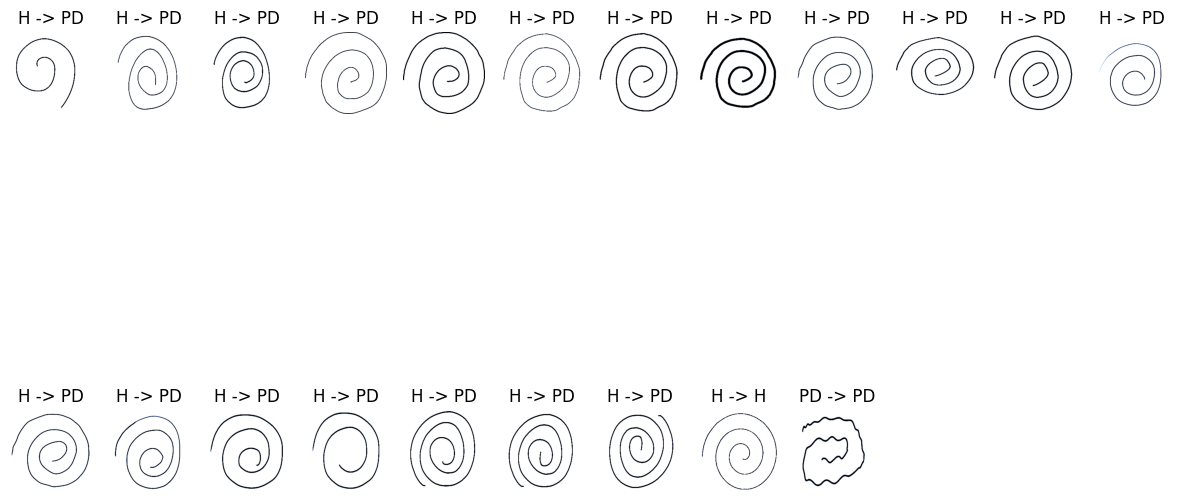

In [ ]:
y_true,y_pred = eval_myTest(model_resnet50,myTest_loader)

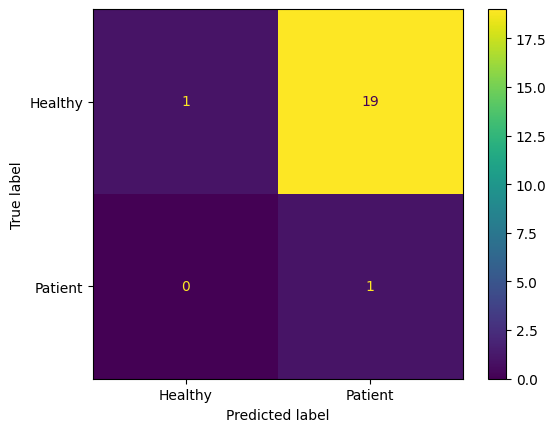

In [ ]:
display_confusionMatrix(y_true,y_pred)

## densenet121

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        20
           1       0.07      1.00      0.12         1

    accuracy                           0.33        21
   macro avg       0.53      0.65      0.29        21
weighted avg       0.96      0.33      0.45        21



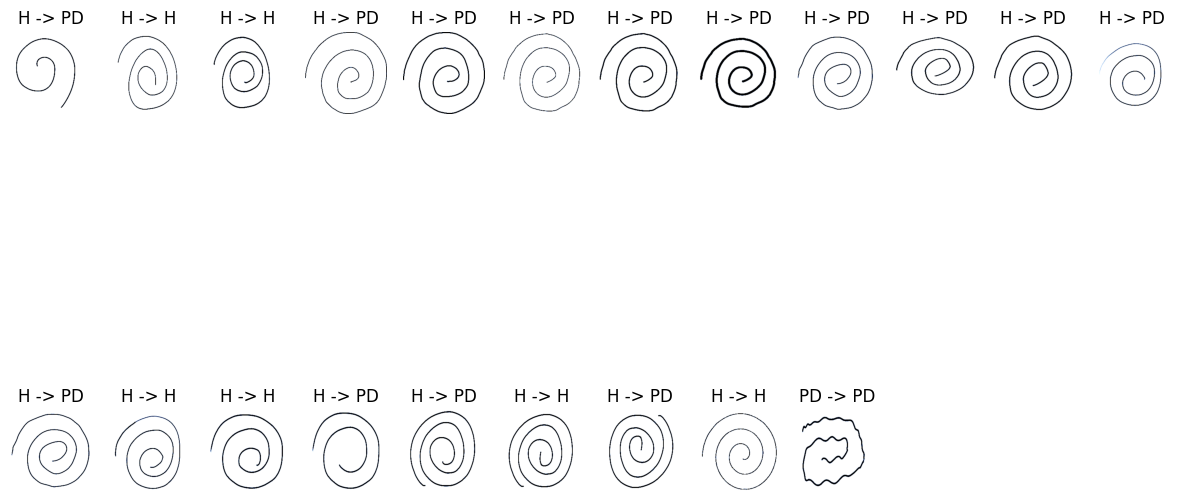

In [ ]:
y_true,y_pred = eval_myTest(model_densenet121,myTest_loader)

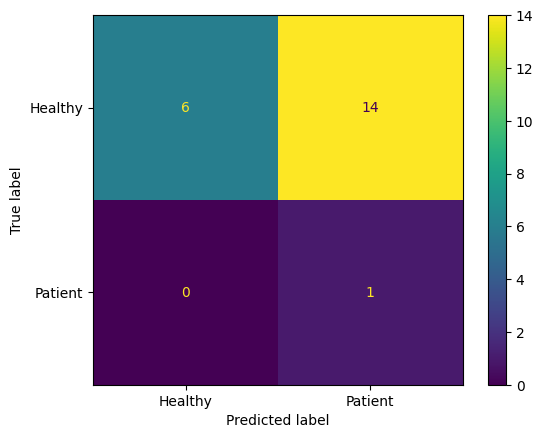

In [ ]:
display_confusionMatrix(y_true,y_pred)

## densenet201

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        20
           1       0.07      1.00      0.13         1

    accuracy                           0.38        21
   macro avg       0.54      0.68      0.33        21
weighted avg       0.96      0.38      0.50        21



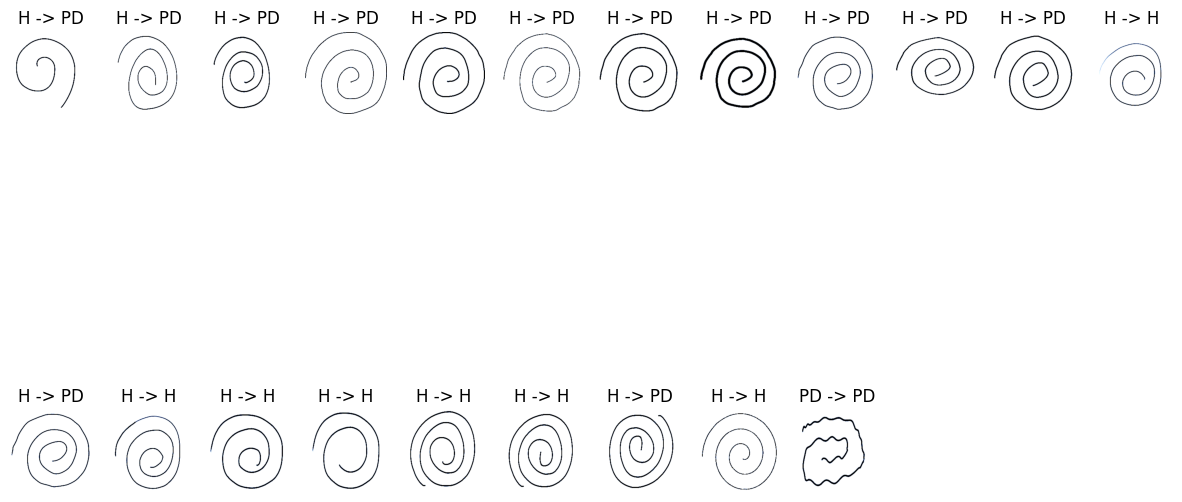

In [ ]:
y_true,y_pred = eval_myTest(model_densenet201,myTest_loader)

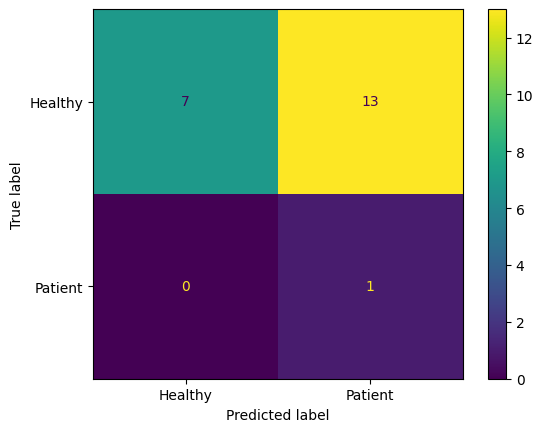

In [ ]:
display_confusionMatrix(y_true,y_pred)

## vgg16

True


  0%|          | 0/1 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        20
           1       0.07      1.00      0.13         1

    accuracy                           0.38        21
   macro avg       0.54      0.68      0.33        21
weighted avg       0.96      0.38      0.50        21



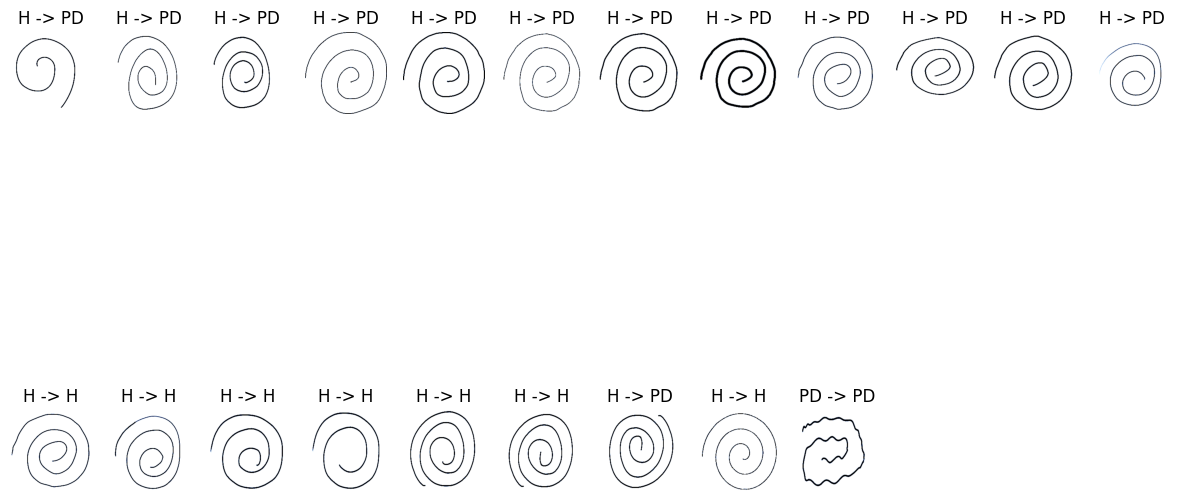

In [ ]:
y_true,y_pred = eval_myTest(model_vgg16,myTest_loader)

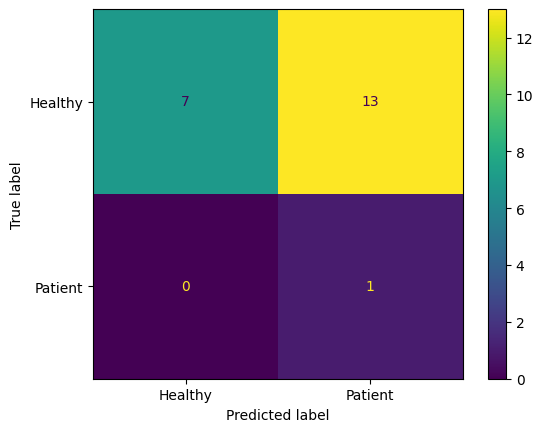

In [ ]:
display_confusionMatrix(y_true,y_pred)